# Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [1]:
%run -i function.py


In [2]:

df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                           engine="openpyxl", sheet_name=None, skiprows=1,)

# Print the name of each sheets


5 Stations with different soil profiles and slope.


## Load all the precipitation in the stations

In [3]:
station_name = list(df_station.keys())[:5]
station_name


['F102', 'F106', 'F107', 'F108', 'F110']

## Precipitation of all the stations


In [4]:
precipitation = df_station['F102'].iloc[:, :2].set_index('Date')

for i in station_name:
    precipitation = precipitation.merge(df_station[i].iloc[:, :2].set_index(
        'Date').rename(columns={'mm': i}), left_index=True, right_index=True)
precipitation = precipitation.drop(columns='mm')

precipitation = precipitation.replace([-996,-999], np.nan)
precipitation.describe()


F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

In [5]:
# Load the excel
data = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                     engine="openpyxl", sheet_name=None, )
data.keys()


dict_keys(['F102', 'F106', 'F107', 'F108', 'F110', 'MESONET HINT_TEMP', 'Discharge', 'Soils_Slopes'])

<AxesSubplot:ylabel='Date'>

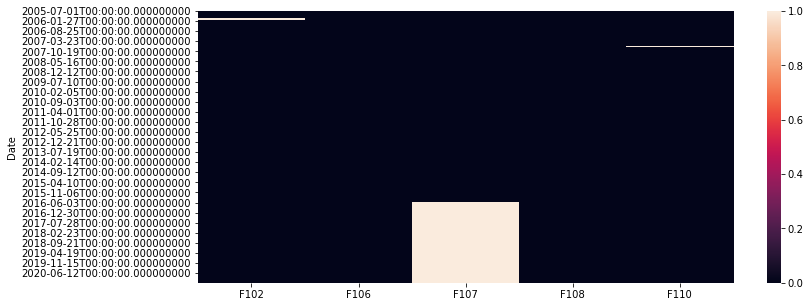

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(precipitation.isna())


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

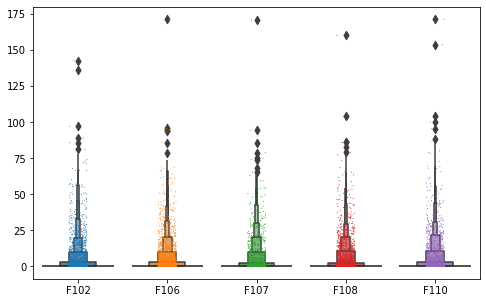

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=precipitation, size= 1)
sns.boxenplot(data=precipitation)
data['Soils_Slopes']


<AxesSubplot:xlabel='Date'>

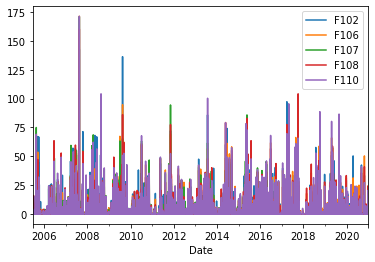

In [8]:
precipitation.plot()

In [9]:
precipitation.describe()


F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

Stations with the least missing precipitaion values are preferred for analysis listed below in descending order
- F106
- F110
- F102
- F107

Check the correlation between the precipitation at the different station 

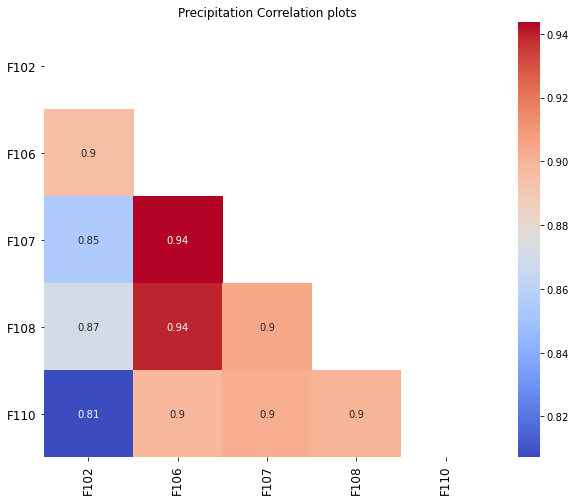

In [10]:
corr_plot(precipitation, 'Precipitation Correlation plots')


We choose the station with the most complete precipitation "F108".
<mark>F108</mark> has a high correlation with <mark>F106</mark> station that happens to be the next complete.
They both have the same soil property but different slopes


In [11]:
data["Soils_Slopes"]


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

## Load the Temperature data

We have a single temperature data for all the stations located in sheetnamae <mark> MESONET HINT_TEMP</mark>

In [12]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = data["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})

# Merge the temperature and precipitation for the F108 station
df_F108 = Temperature.merge(precipitation['F108'], how='inner', on='Date')
df_F108 = df_F108.rename(columns={'F108': "PRCP (mm)"})


In [13]:
df_F108["CMS"] = data["Discharge"].set_index('Date').loc['2005-07-01':]

In [14]:
status(df_F108)


+-----------+--------------+---------------+------------+
| Features  | Observations | No of missing | % Missing  |
+-----------+--------------+---------------+------------+
| TMAX (C)  |     5663     |       0       |    0.0%    |
| TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm) |     5663     |       2       |    0.0%    |
|    CMS    |     5663     |       0       |    0.0%    |
+-----------+--------------+---------------+------------+


In [15]:
# replace all odd values due to instrument reading and linear interpolate
df_F108 = df_F108.replace(-571.105400, np.nan)
df_F108 = df_F108.interpolate(method='linear', limit_direction='both')
status(df_F108)


+-----------+--------------+---------------+------------+
| Features  | Observations | No of missing | % Missing  |
+-----------+--------------+---------------+------------+
| TMAX (C)  |     5663     |       0       |    0.0%    |
| TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm) |     5663     |       0       |    0.0%    |
|    CMS    |     5663     |       0       |    0.0%    |
+-----------+--------------+---------------+------------+


## Merge the soil properties, temperature and precipitation 

In [16]:
df_F108 = df_F108.merge(df_station['F108'].drop(columns='mm'),
                        how='inner', on='Date')

# set the date as the index of the dataframe
df_F108 = df_F108.set_index('Date')

# Rename the soil columns
df_F108 = df_F108.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


### Deal with the missing values.

In [17]:
# replace all the -998  adn -996 with np.nan
df_F108 = df_F108.replace([-998, -996], np.nan)

status(df_F108)


+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5663     |       0       |    0.0%    |
|  TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm)  |     5663     |       0       |    0.0%    |
|    CMS     |     5663     |       0       |    0.0%    |
| SM 5 (cm)  |     5663     |      88       |    1.6%    |
| SM 25 (cm) |     5663     |      88       |    1.6%    |
| SM 45 (cm) |     5663     |      88       |    1.6%    |
+------------+--------------+---------------+------------+


<AxesSubplot:ylabel='Date'>

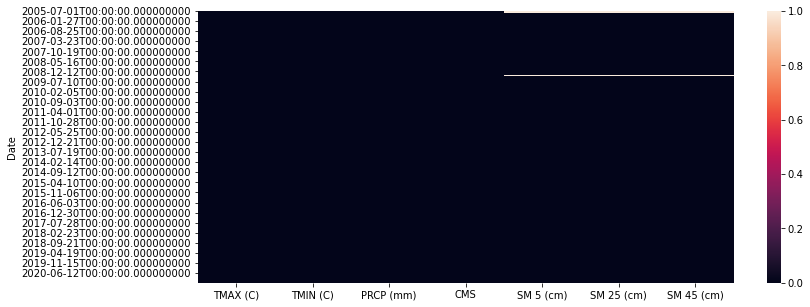

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F108.isna())


In [19]:
display_side_by_side([sequence_of_missing_values(df_F108, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F108, 'SM 25 (cm)'), sequence_of_missing_values(df_F108, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )


Drop the first 56 rows till 2005-08-26 and linear interpolate the dataframe

In [20]:
df_F108 = df_F108.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F108)


+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5607     |       0       |    0.0%    |
|  TMIN (C)  |     5607     |       0       |    0.0%    |
| PRCP (mm)  |     5607     |       0       |    0.0%    |
|    CMS     |     5607     |       0       |    0.0%    |
| SM 5 (cm)  |     5607     |       0       |    0.0%    |
| SM 25 (cm) |     5607     |       0       |    0.0%    |
| SM 45 (cm) |     5607     |       0       |    0.0%    |
+------------+--------------+---------------+------------+


In [21]:
var_list = ['TMAX (C)', 'TMIN (C)', 'PRCP (mm)', 'CMS', 'SM 5 (cm)', 'SM 25 (cm)', 'SM 45 (cm)']

# F108

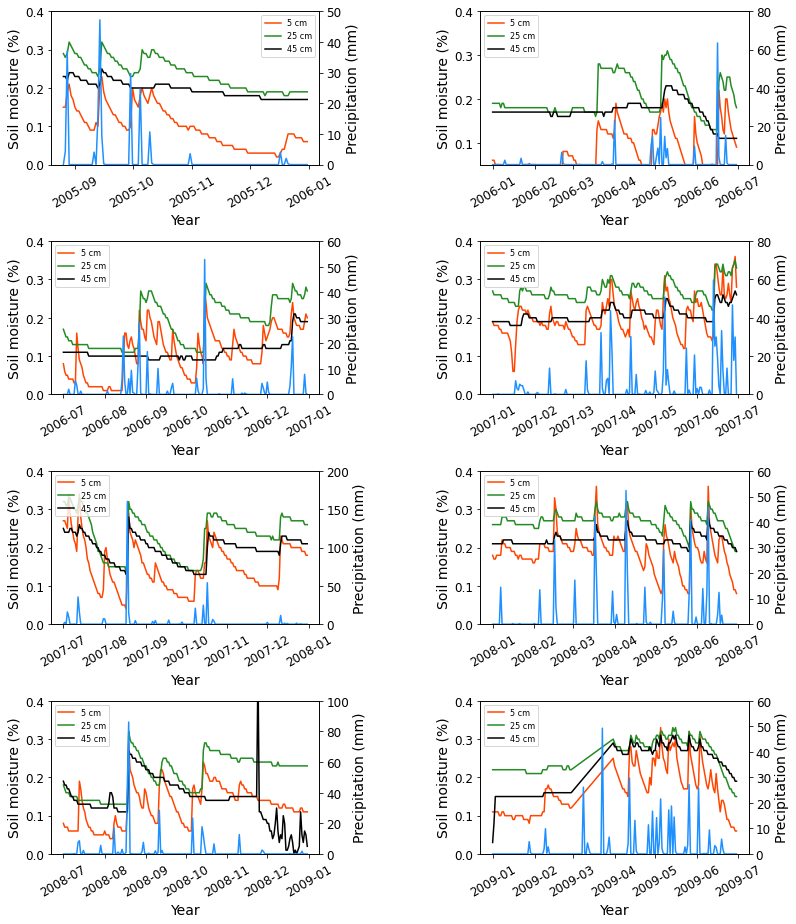

In [22]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2005-08-26', '2006-01-01', '2006-07-01', '2007-01-01', '2007-07-01', '2008-01-01', '2008-07-01', \
                   '2009-01-01'] 
time_seg_end    = ['2005-12-31', '2006-06-30', '2006-12-31', '2007-06-30', '2007-12-31', '2008-06-30', '2008-12-31', \
                   '2009-06-30']
df              =  df_F108.copy()
font_size     = 14
ylim_min      = [0.0,  0.05,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]      
ylim_max      = [0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4]
ylim_twin_min = [  0,     0,     0,     0,     0,     0,     0,     0]
ylim_twin_max = [ 50,    80,    60,    80,    200,   60,    100,   60] 
leg_loc       = [  1,     2,     2,     2,     2,     2,     2,     2]
xtic_rot      = [ 30,    30,    30,    30,    30,    30,    30,    30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)




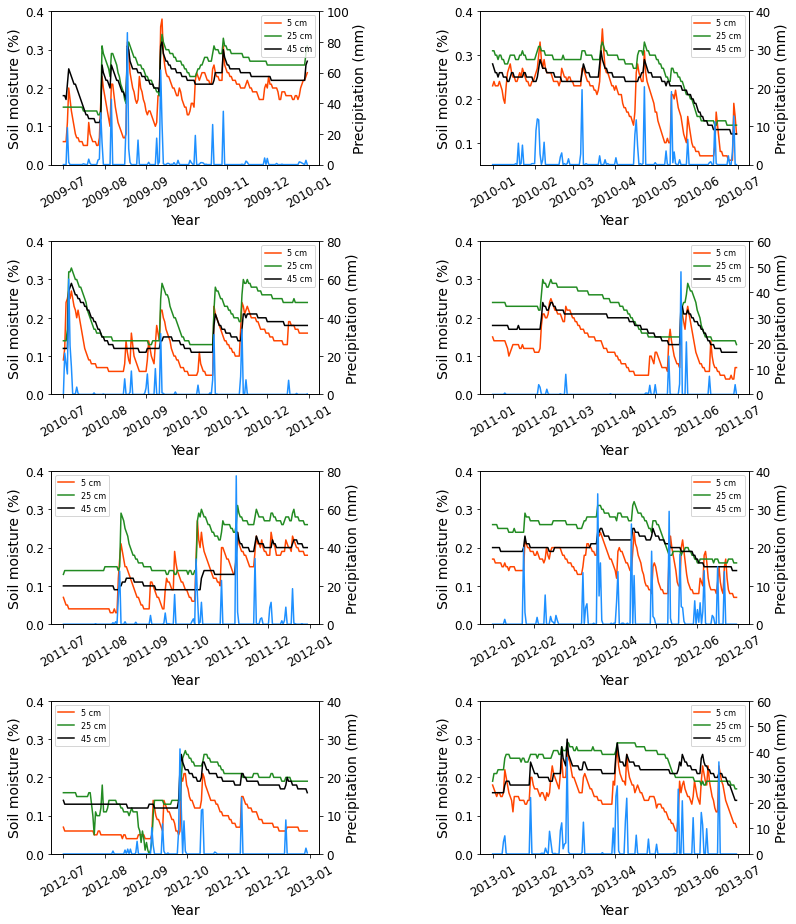

In [23]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2009-07-01', '2010-01-01', '2010-07-01', '2011-01-01', '2011-07-01', '2012-01-01', '2012-07-01', \
                   '2013-01-01'] 
time_seg_end    = ['2009-12-31', '2010-06-30', '2010-12-31', '2011-06-30', '2011-12-30', '2012-06-30', '2012-12-30', \
                   '2013-06-30']
df              =  df_F108.copy()
font_size     = 14
ylim_min      = [0.0,  0.05,  0.0, 0.00,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.4,  0.4,  0.4,   0.4,   0.4,   0.4,  0.4]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [100,    40,   80,   60,    80,    40,    40,   60] 
leg_loc       = [  1,     1,    1,    1,     2,     1,     2,    1]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

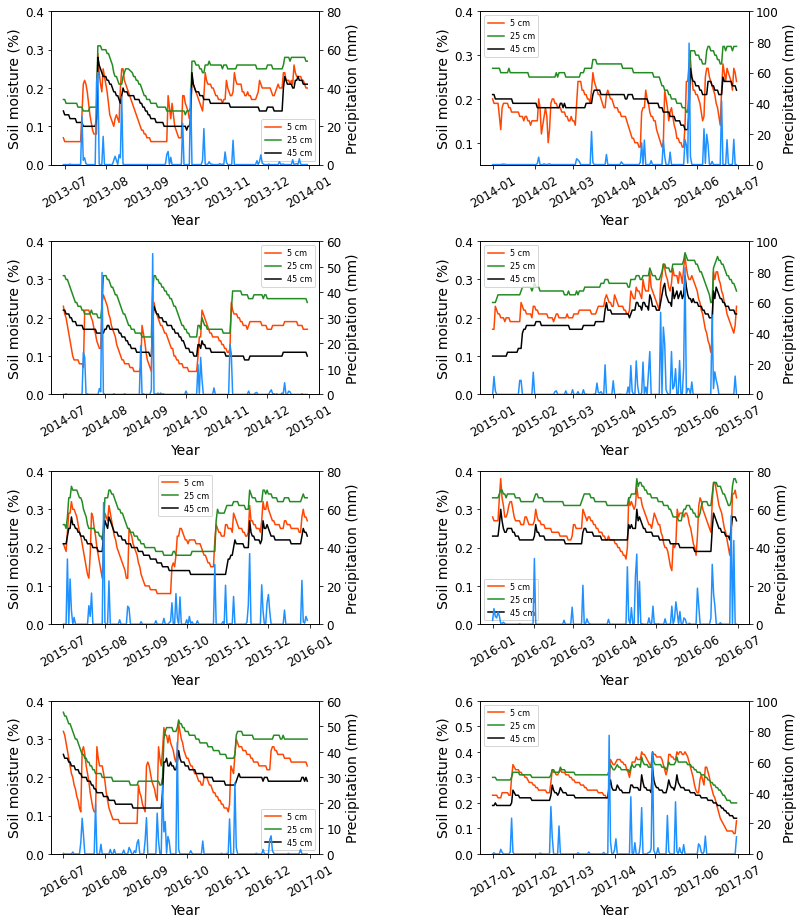

In [24]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2013-06-30', '2014-01-01', '2014-07-01', '2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01', \
                   '2017-01-01'] 
time_seg_end    = ['2013-12-31', '2014-06-30', '2014-12-31', '2015-06-30', '2015-12-30', '2016-06-30', '2016-12-30', \
                   '2017-06-30']
df              =  df_F108.copy()
font_size     = 14
ylim_min      = [0.0,  0.05,  0.0, 0.00,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.4,  0.4,  0.4,   0.4,   0.4,   0.4,  0.6]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [ 80,   100,   60,  100,    80,    80,    60,  100] 
leg_loc       = [  4,     2,    1,    2,     9,     3,     4,    2]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

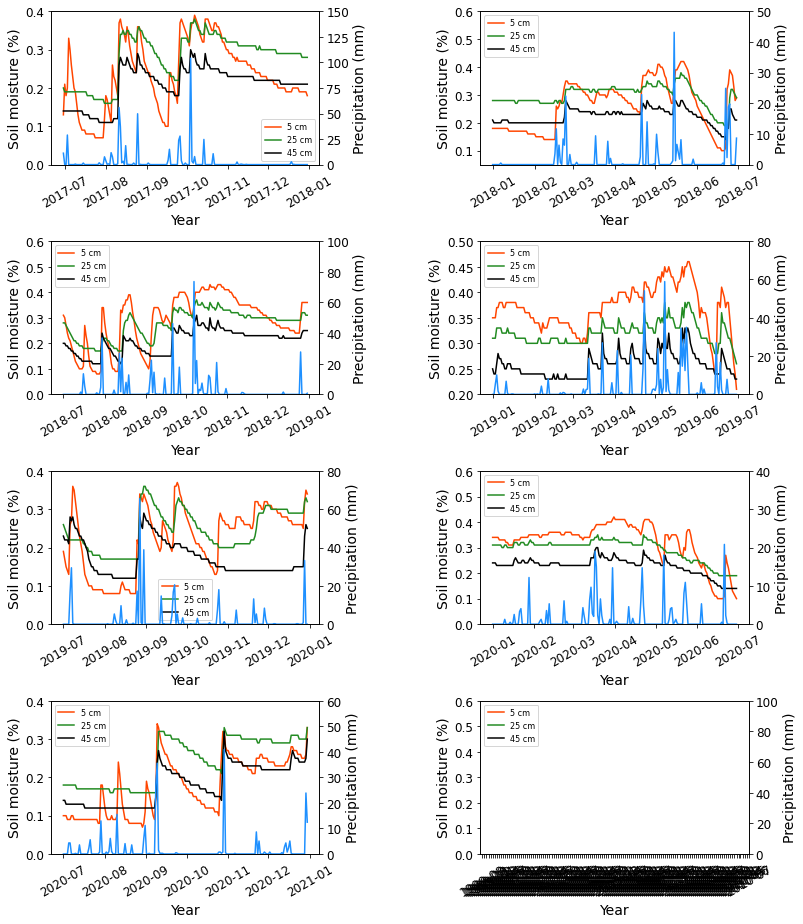

In [42]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2017-06-30', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01', '2020-07-01', \
                   '2021-01-01'] 
time_seg_end    = ['2017-12-31', '2018-06-30', '2018-12-31', '2019-06-30', '2019-12-30', '2020-06-30', '2020-12-30', \
                   '2021-06-30']
df              =  df_F108.copy()
font_size     = 14
ylim_min      = [0.0,  0.05,  0.0, 0.20,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.6,  0.6,  0.5,   0.4,   0.6,   0.4,  0.6]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [150,    50,  100,   80,    80,    40,    60,  100] 
leg_loc       = [  4,     2,    2,    2,     8,     2,     2,    2]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

## suggested corrections -F108

In [26]:
# 1-- Remove data prior to Dec-2006, as SM-45 sensor does not seem to work correctly 

condition = df_F108.index > '2006-12-01'
df_F108   = df_F108.loc[condition]

# 2-- A spike in SM-45 between Nov-2008 and Dec 2008 does not seem to be accurate
#     find out when this happened (date), replace it with NaN, and then fill-in via interpolation
condition = (df_F108.index > '2008-11-01') & (df_F108.index < '2008-12-01')  & \
            (df_F108[df_F108.columns[6]] > 0.4)
print(df_F108.loc[condition, 'SM 45 (cm)'])

df_F108.loc[condition, 'SM 45 (cm)'] == np.NaN
df_F108['SM 45 (cm)'].interpolate(method='linear', limit_direction='both', inplace = True)
#print(status(df_F108))

# the rest of the data seems to be suitable for the analysis
#------------------------------------------------------------
# data size
print('sample size', len(df_F108))

Date
2008-11-24    0.49
Name: SM 45 (cm), dtype: float64
sample size 5144


# F106


In [27]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = data["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})

# Merge the temperature and precipitation for the F106 station
df_F106 = Temperature.merge(precipitation['F106'], how='inner', on='Date')
df_F106 = df_F106.rename(columns={'F106': "PRCP (mm)"})
#df_F106

In [28]:
df_F106["CMS"] = data["Discharge"].set_index('Date').loc['2005-07-01':]
#df_F106

In [29]:
status(df_F106)

+-----------+--------------+---------------+------------+
| Features  | Observations | No of missing | % Missing  |
+-----------+--------------+---------------+------------+
| TMAX (C)  |     5663     |       0       |    0.0%    |
| TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm) |     5663     |      15       |    0.3%    |
|    CMS    |     5663     |       0       |    0.0%    |
+-----------+--------------+---------------+------------+


In [30]:
# replace all odd values due to instrument reading and linear interpolate
df_F106 = df_F106.replace(-571.105400, np.nan)
df_F106 = df_F106.interpolate(method='linear', limit_direction='both')
status(df_F106)

+-----------+--------------+---------------+------------+
| Features  | Observations | No of missing | % Missing  |
+-----------+--------------+---------------+------------+
| TMAX (C)  |     5663     |       0       |    0.0%    |
| TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm) |     5663     |       0       |    0.0%    |
|    CMS    |     5663     |       0       |    0.0%    |
+-----------+--------------+---------------+------------+


## Merge the soil properties, temperature and precipitation 

In [31]:
df_F106 = df_F106.merge(df_station['F106'].drop(columns='mm'),
                        how='inner', on='Date')

# set the date as the index of the dataframe
df_F106 = df_F106.set_index('Date')

# Rename the soil columns
df_F106 = df_F106.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


## replace missing values with NaN

In [32]:
# replace all the -998  and -996 with np.nan
df_F106 = df_F106.replace([-998, -996], np.nan)

status(df_F106)

+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5663     |       0       |    0.0%    |
|  TMIN (C)  |     5663     |       0       |    0.0%    |
| PRCP (mm)  |     5663     |       0       |    0.0%    |
|    CMS     |     5663     |       0       |    0.0%    |
| SM 5 (cm)  |     5663     |      106      |    1.9%    |
| SM 25 (cm) |     5663     |      106      |    1.9%    |
| SM 45 (cm) |     5663     |      106      |    1.9%    |
+------------+--------------+---------------+------------+


<AxesSubplot:ylabel='Date'>

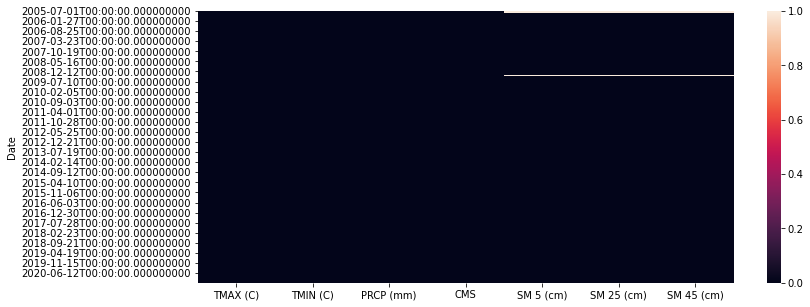

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F106.isna())

In [34]:
display_side_by_side([sequence_of_missing_values(df_F106, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F106, 'SM 25 (cm)'), sequence_of_missing_values(df_F106, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )


In [35]:
df_F106 = df_F106.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F106)

+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5607     |       0       |    0.0%    |
|  TMIN (C)  |     5607     |       0       |    0.0%    |
| PRCP (mm)  |     5607     |       0       |    0.0%    |
|    CMS     |     5607     |       0       |    0.0%    |
| SM 5 (cm)  |     5607     |       0       |    0.0%    |
| SM 25 (cm) |     5607     |       0       |    0.0%    |
| SM 45 (cm) |     5607     |       0       |    0.0%    |
+------------+--------------+---------------+------------+


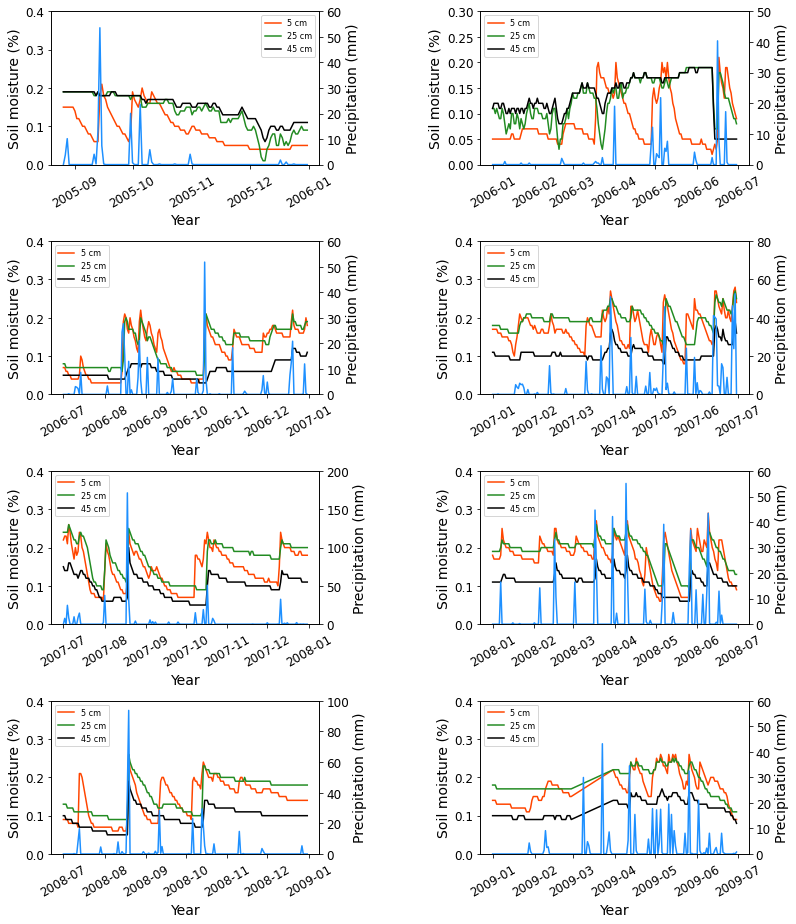

In [36]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2005-08-26', '2006-01-01', '2006-07-01', '2007-01-01', '2007-07-01', '2008-01-01', '2008-07-01', \
                   '2009-01-01'] 
time_seg_end    = ['2005-12-31', '2006-06-30', '2006-12-31', '2007-06-30', '2007-12-31', '2008-06-30', '2008-12-31', \
                   '2009-06-30']
df              =  df_F106.copy()
font_size     = 14
ylim_min      = [0.0,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]      
ylim_max      = [0.4,   0.3,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4]
ylim_twin_min = [  0,     0,     0,     0,     0,     0,     0,     0]
ylim_twin_max = [ 60,    50,    60,    80,    200,   60,    100,   60] 
leg_loc       = [  1,     2,     2,     2,     2,     2,     2,     2]
xtic_rot      = [ 30,    30,    30,    30,    30,    30,    30,    30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)




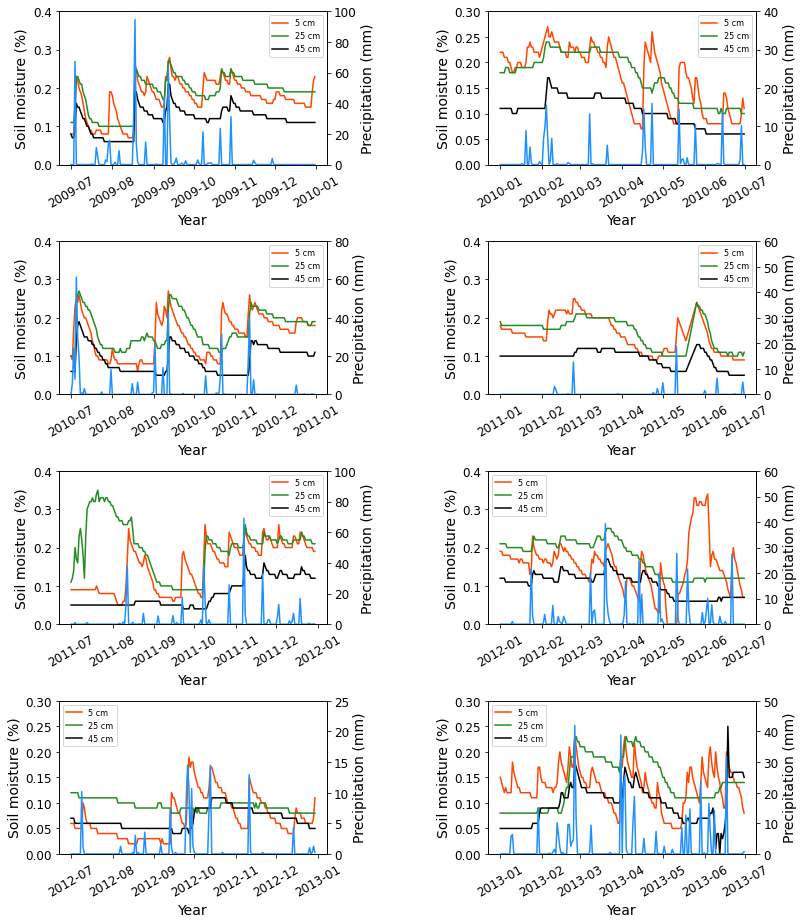

In [37]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2009-07-01', '2010-01-01', '2010-07-01', '2011-01-01', '2011-07-01', '2012-01-01', '2012-07-01', \
                   '2013-01-01'] 
time_seg_end    = ['2009-12-31', '2010-06-30', '2010-12-31', '2011-06-30', '2011-12-30', '2012-06-30', '2012-12-30', \
                   '2013-06-30']
df              =  df_F106.copy()
font_size     = 14
ylim_min      = [0.0,   0.0,  0.0, 0.00,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.3,  0.4,  0.4,   0.4,   0.4,   0.3,  0.3]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [100,    40,   80,   60,   100,    60,    25,   50] 
leg_loc       = [  1,     1,    1,    1,     1,     2,     2,    2]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

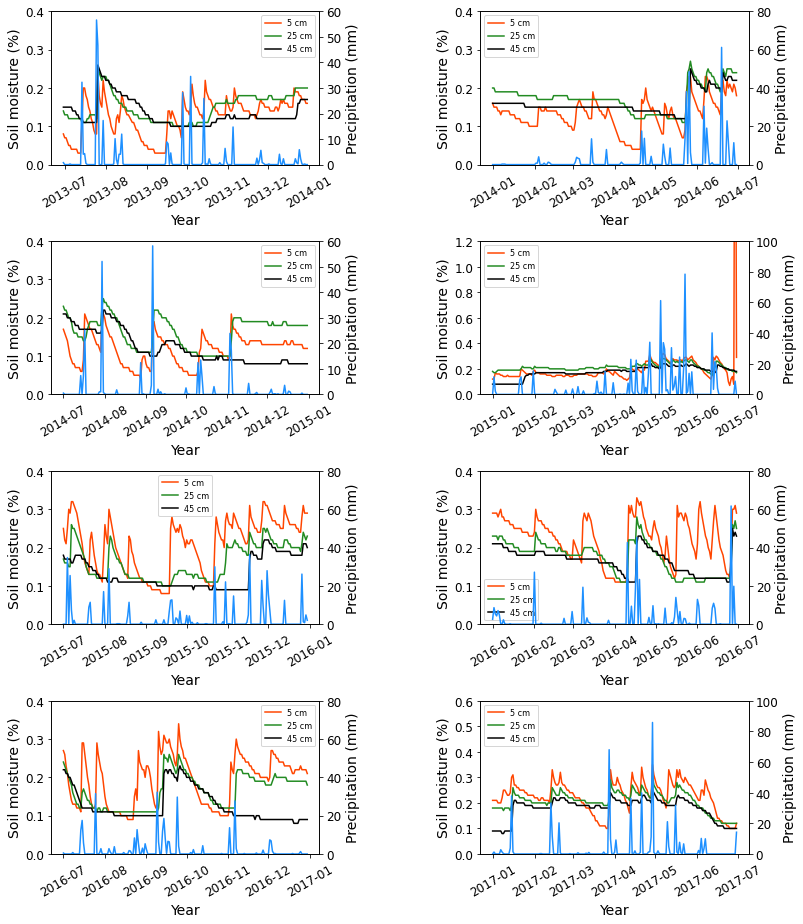

In [38]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2013-06-30', '2014-01-01', '2014-07-01', '2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01', \
                   '2017-01-01'] 
time_seg_end    = ['2013-12-31', '2014-06-30', '2014-12-31', '2015-06-30', '2015-12-30', '2016-06-30', '2016-12-30', \
                   '2017-06-30']
df              =  df_F106.copy()
font_size     = 14
ylim_min      = [0.0,   0.0,  0.0, 0.00,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.4,  0.4,  1.2,   0.4,   0.4,   0.4,  0.6]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [ 60,    80,   60,  100,    80,    80,    80,  100] 
leg_loc       = [  1,     2,    1,    2,     9,     3,     1,    2]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

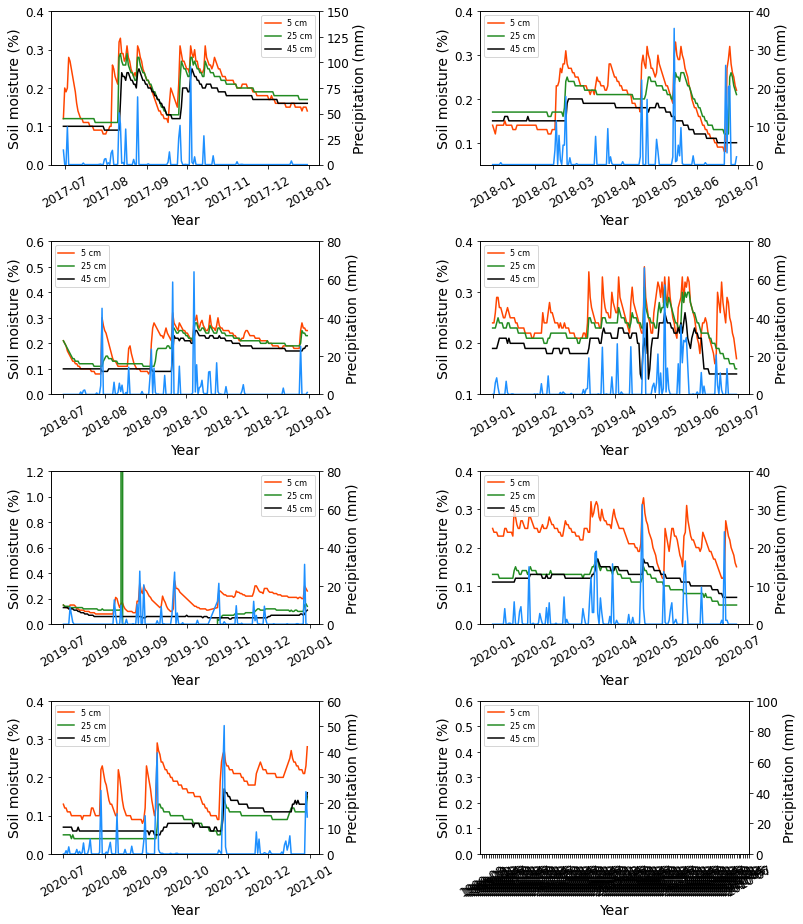

In [39]:
fig = plt.figure()
fig.set_size_inches(12.5, 15.5)
m = 4; n = 2

clim_var_index  = 2
clim_var_ylabel = 'Precipitation (mm)'
time_seg_start  = ['2017-06-30', '2018-01-01', '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01', '2020-07-01', \
                   '2021-01-01'] 
time_seg_end    = ['2017-12-31', '2018-06-30', '2018-12-31', '2019-06-30', '2019-12-30', '2020-06-30', '2020-12-30', \
                   '2021-06-30']
df              =  df_F106.copy()
font_size     = 14
ylim_min      = [0.0,  0.05,  0.0,  0.1,  0.00,  0.00,  0.00,  0.0]      
ylim_max      = [0.4,   0.4,  0.6,  0.4,   1.2,   0.4,   0.4,  0.6]
ylim_twin_min = [  0,     0,    0,    0,     0,     0,     0,    0]
ylim_twin_max = [150,    40,   80,   80,    80,    40,    60,  100] 
leg_loc       = [  1,     2,    2,    2,     1,     2,     2,    2]
xtic_rot      = [ 30,    30,   30,   30,    30,    30,    30,   30]

df_test = multiplot_SM_vs_ClimateVar(m, n, time_seg_start, time_seg_end, df, var_list, clim_var_index, clim_var_ylabel, \
                                     ylim_min, ylim_max, ylim_twin_min, ylim_twin_max, leg_loc, xtic_rot, font_size)

## suggested corrections -F106

In [41]:
df_F106.columns[6]

'SM 45 (cm)'

In [ ]:
# 1-- Remove data prior to Dec-2006, as SM-45 sensor does not seem to work correctly 

condition = df_F106.index > '2006-12-01'
df_F106   = df_F106.loc[condition]

# 2-- no idea why SM-25 is so high between 2011-07 and 2011-08 when there was very little Precip and also very little 
#     soil moisture in the top 5-25 cm (SM-25).


# 3-- spike in SM-5  2015-07 inaccurate
condition = (df_F106.index > '2015-06-01') & (df_F106.index < '2015-07-31')  & \
            (df_F106[df_F106.columns[6]] > 1.0)
print(df_F106.loc[condition, 'SM 5 (cm)'])   # SM cannot exceed 1.0

# replace it with NaN, and then fill-in by interpolation
df_F106.loc[condition, 'SM 5 (cm)'] = np.NaN
df_F106['SM 5 (cm)'].interpolate(method='linear', limit_direction='both', inplace = True)
#status(df_F106)


# 4-- spike in SM-25 2019-08 inaccurate  
condition = (df_F106.index > '2019-08-01') & (df_F106.index < '2019-09-30')  & \
            (df_F106[df_F106.columns[7]] > 1.0)
print(df_F106.loc[condition, 'SM 25 (cm)'])   # SM cannot exceed 1.0

# replace it with NaN, and then fill-in by interpolation
df_F106.loc[condition, 'SM 25 (cm)'] = np.NaN
df_F106['SM 25 (cm)'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
#status(df_F106)

Date
2015-06-29    3.86
Name: SM 5 (cm), dtype: float64
Date
2019-08-14    267.15
Name: SM 25 (cm), dtype: float64


# Feature Engineering

- create median and mean precipitations weekly and yearly frequency. 
- check the correlation between features on both time format.
- load the yearly yeild
- Split the data into train and test
- Create the pipeline no tuning yet
-- XGBoost
-- Catboost
-- Random Forest
-- ExtraTree

## Correlation plots

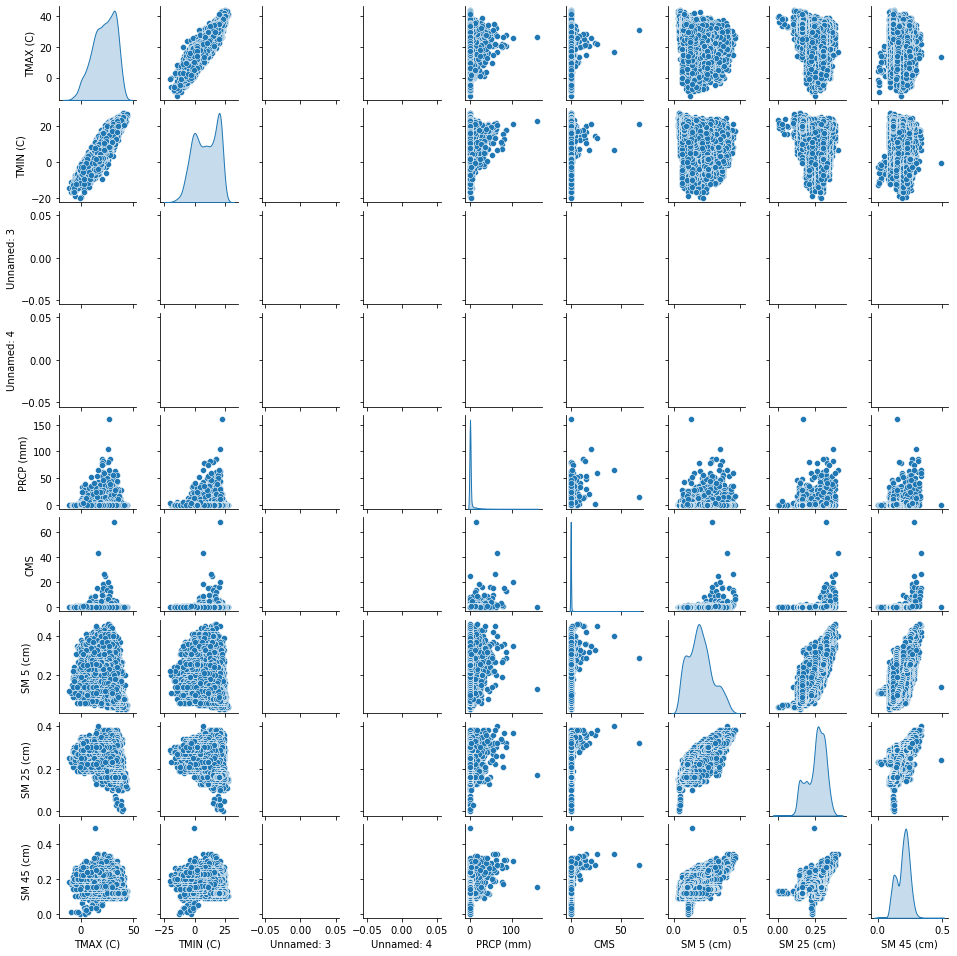

In [ ]:
sns.pairplot(df_F108, diag_kind='kde', height=1.5)


### resample to weekly values and check correlation


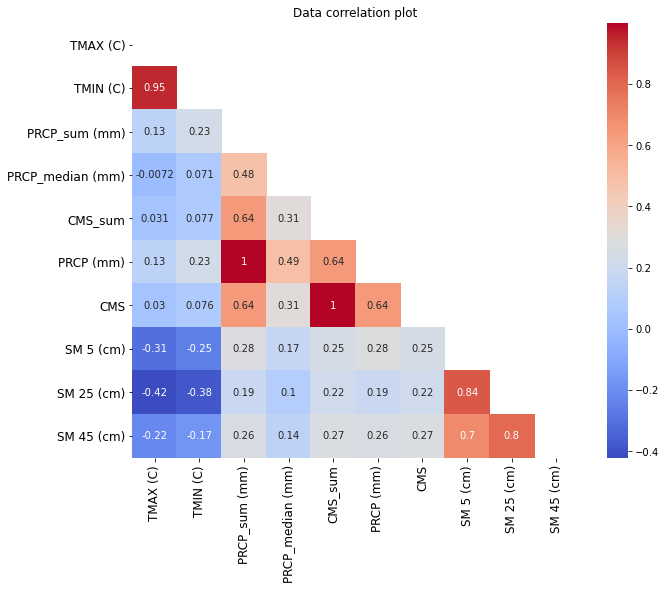

In [ ]:
# Resample the temperature
resampled = df_F108[['TMAX (C)', "TMIN (C)"]].resample('W').median()
# Resample the Precipitation sum and median
resampled["PRCP_sum (mm)"] = df_F108["PRCP (mm)"].resample('W').sum()
resampled["PRCP_median (mm)"] = df_F108["PRCP (mm)"].resample('W').median()
# Resample the discharge sum
resampled["CMS_sum"] = df_F108["CMS"].resample('W').sum()
# Resample the SM
resampled_SM = df_F108.iloc[:, 4:].resample('W').mean()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F108_resampled, 'Data correlation plot')


The pearson correlation shows that the resampled weekly mean PRCP (mm) has a higher correlation with other features than the median

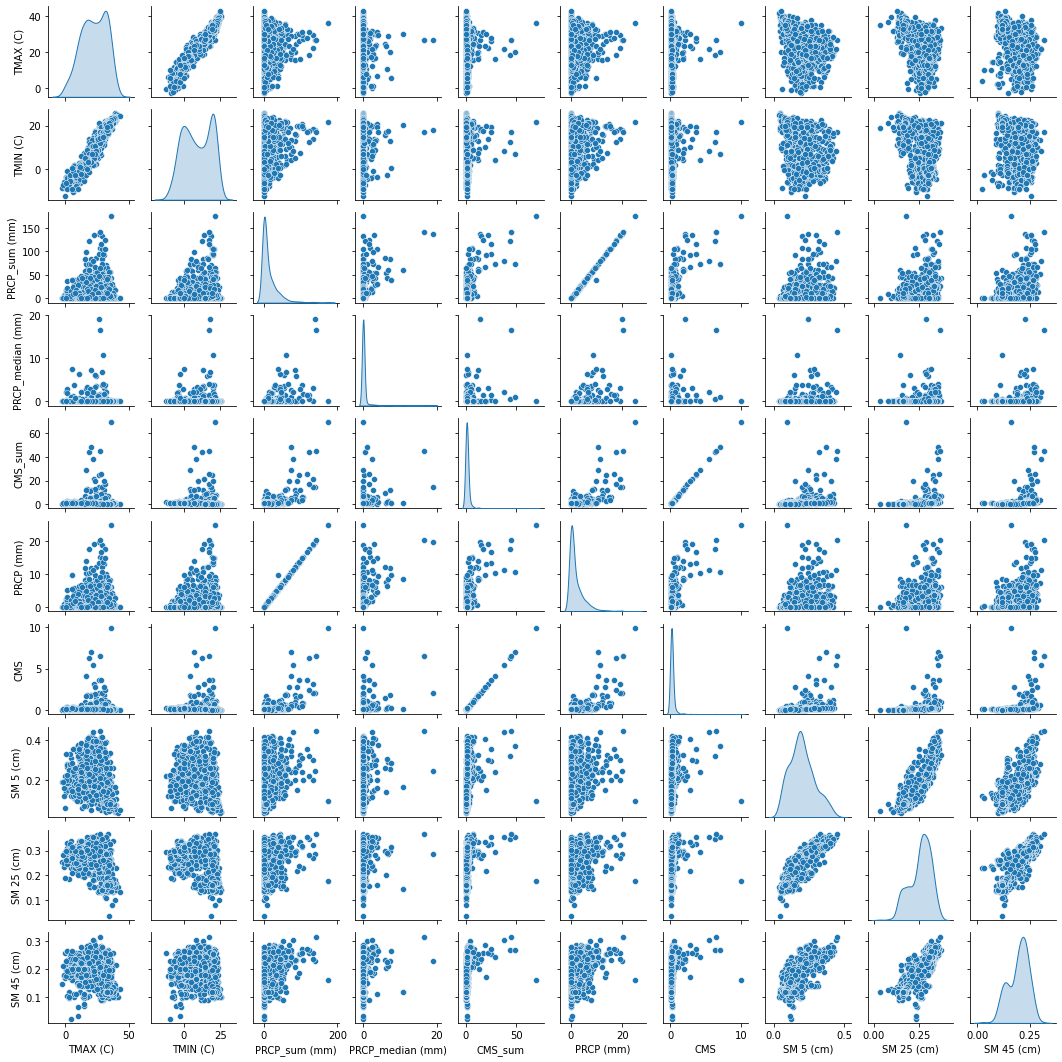

In [ ]:
sns.pairplot(df_F108_resampled, diag_kind='kde', height=1.5)


# df_AI

In [ ]:
df_AI = df_F108_resampled.drop(columns=["PRCP_median (mm)"])

df_AI = df_AI.rename(columns={"PRCP_sum (mm)": "$P [mm]$",
                              "TMAX (C)": "$T_{max}$ [$^oC$]",
                              "TMIN (C)": '$T_{min}$ [$^oC$]',
                              "SM 5 (cm)": "$SM_{5} [cm]$",
                              "SM 25 (cm)": "$SM_{25} [cm]$",
                              "SM 45 (cm)": "$SM_{45} [cm]$",
                              "CMS_sum": "$Dis [CMS]$"})

#corr_plot(df_AI, 'DF_AI correlation plot')


In [ ]:
df_AI['Month'] = df_AI.index.month

# Precipitation Lags
df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)


# Temperature Lags
#df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
#df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

#df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
#df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

# Soil Moisture Lags

#df_AI["$SM_{5}^{lag1}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(1)
#df_AI["$SM_{5}^{lag2}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(2)


In [ ]:
month = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds = df_AI.loc[:, df_AI.columns.str.startswith('$D')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]


df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(ds, on="Date").merge(sm, on="Date").dropna()


In [ ]:
df_AI

Month  $T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P [mm]$  \
Date                                                                
2006-12-17     12          18.577592           1.638872      0.00   
2006-12-24     12           8.388805          -0.594438     36.83   
2006-12-31     12          12.799872           0.633327      8.38   
2007-01-07      1           8.438804          -1.727761      0.25   
2007-01-14      1          12.772094          -4.205514      0.00   
...           ...                ...                ...       ...   
2020-12-06     12          12.549874          -2.299977      0.76   
2020-12-13     12          18.377594          -1.299987      3.30   
2020-12-20     12           7.838811          -2.638863     12.70   
2020-12-27     12          16.827610           0.061110      0.00   
2021-01-03      1           5.444390           0.497217     39.12   

            $P^{lag1} [mm]$  $P^{lag2} [mm]$  $Dis [CMS]$  $SM_{5} [cm]$  \
Date                                                                       
2006-12-17             0.00             0.76     0.599111       0.160000   
2006-12-24             0.00             0.00     0.877583       0.194286   
2006-12-31            36.83             0.00     0.714009       0.184286   
2007-01-07             8.38            36.83     0.659390       0.178571   
2007-01-14             0.25             8.38     0.672125       0.155714   
...                     ...              ...          ...            ...   
2020-12-06             6.09             8.64     0.947484       0.240000   
2020-12-13             0.76             6.09     0.953710       0.230000   
2020-12-20             3.30             0.76     1.142754       0.260000   
2020-12-27            12.70             3.30     0.918901       0.260000   
2021-01-03             0.00            12.70     1.118982       0.287500   

            $SM_{25} [cm]$  $SM_{45} [cm]$  
Date                                        
2006-12-17        0.250000        0.128571  
2006-12-24        0.265714        0.184286  
2006-12-31        0.261429        0.191429  
2007-01-07        0.261429        0.190000  
2007-01-14        0.247143        0.188571  
...                    ...             ...  
2020-12-06        0.295714        0.220000  
2020-12-13        0.290000        0.220000  
2020-12-20        0.298571        0.237143  
2020-12-27        0.304286        0.244286  
2021-01-03        0.312500        0.265000  

[734 rows x 10 columns]

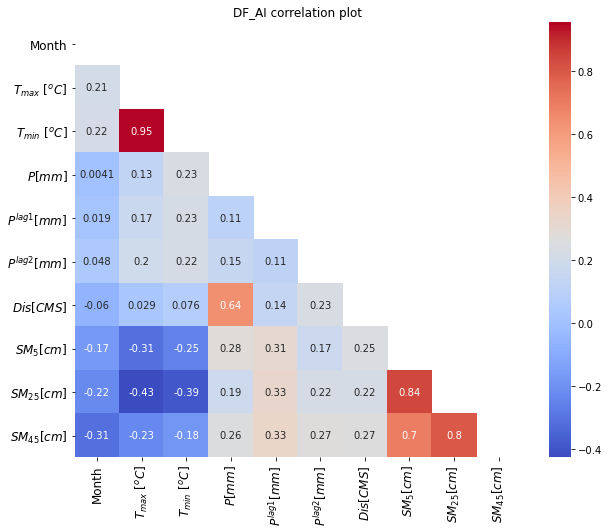

In [ ]:
corr_plot(df_AI, 'DF_AI correlation plot')


## Build Model Pipeline

# Predicting soil moisture at 5 cm

In [ ]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -3].values # SM 5cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [ ]:
def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


In [ ]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)

[00:14:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.92   | 0.02 |
|   XGBoost    |   0.8    | 0.04 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.03 |
|   XGBoost    |   0.9    | 0.03 |
|  ExtraTree   |   0.85   | 0.03 |
+--------------+----------+------+


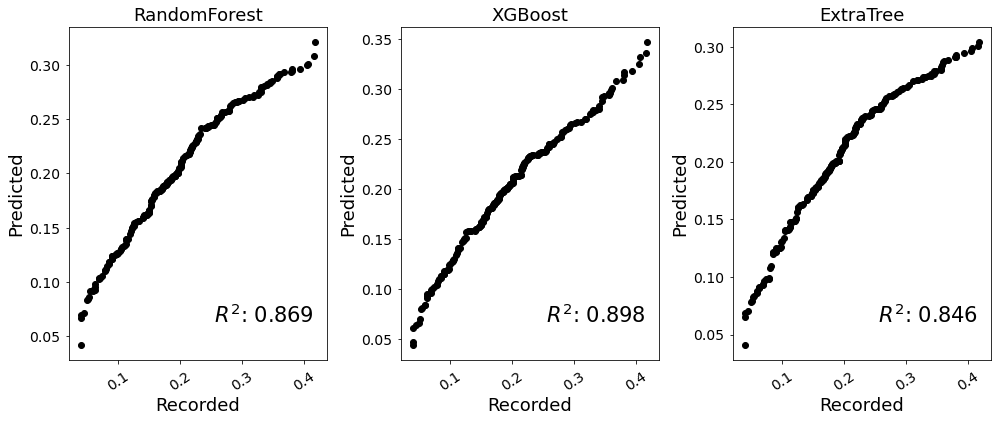

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


 Randomforest gives the best results for the test result although performs the least on training 
 while the RMSE is equal for both the XGBoost and the Extratree

# Predicting soil moisture at 25 cm

In [ ]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -2].values # SM 25cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [ ]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


#################################################################################################
#################################################################################################



In [ ]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)

[00:14:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.95   | 0.01 |
|   XGBoost    |   0.85   | 0.02 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.95   | 0.01 |
|   XGBoost    |   0.93   | 0.01 |
|  ExtraTree   |   0.94   | 0.01 |
+--------------+----------+------+


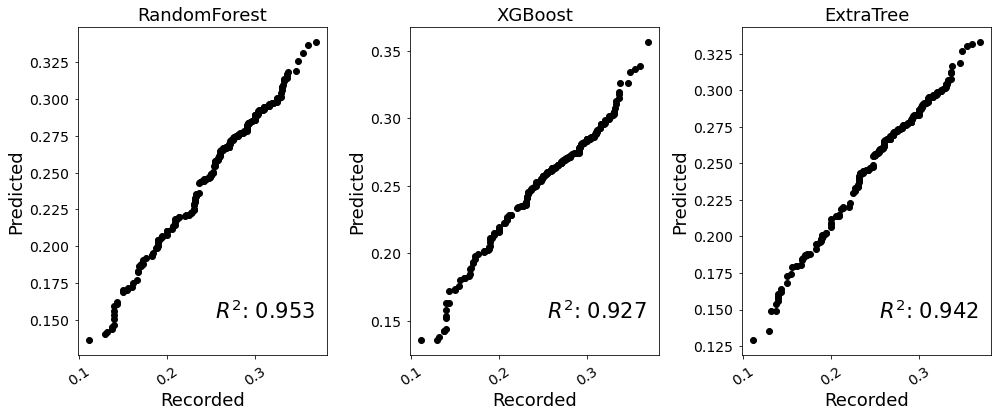

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


# Predicting soil moisture at 45 cm

In [ ]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -1].values # SM 45cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [ ]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results




In [ ]:
#################################################################################################
#################################################################################################




[00:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.94   | 0.01 |
|   XGBoost    |   0.83   | 0.02 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.01 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.93   | 0.01 |
+--------------+----------+------+


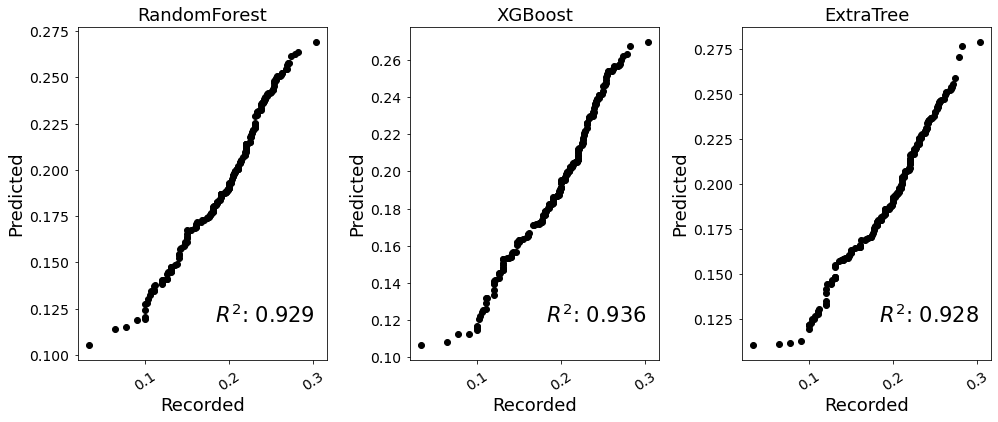

In [ ]:
#################################################################################################
#################################################################################################

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


## Shapley Analysis

In [ ]:
current_directory = os.getcwd()
path_to_save = current_directory+r'/F108'
os.makedirs(path_to_save, exist_ok=True)

In [ ]:
Features = list(df_AI.iloc[:, :-3].columns)
Features 

['Month',
 '$T_{max}$ [$^oC$]',
 '$T_{min}$ [$^oC$]',
 '$P [mm]$',
 '$P^{lag1} [mm]$',
 '$P^{lag2} [mm]$',
 '$Dis [CMS]$']

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


[00:14:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


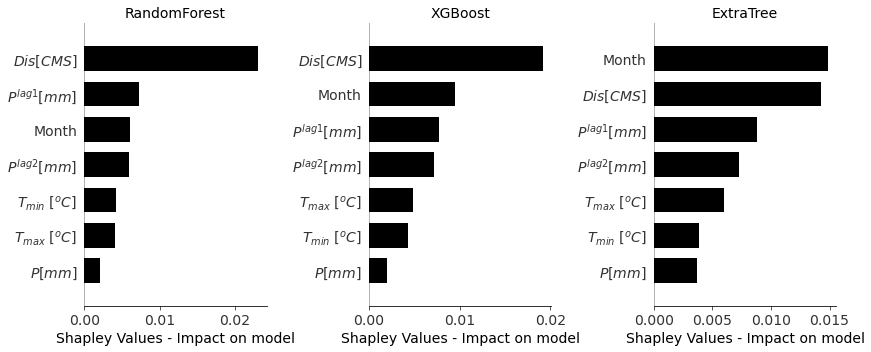

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipeliner):
    Modeled = model[0].fit(X, y.ravel())
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


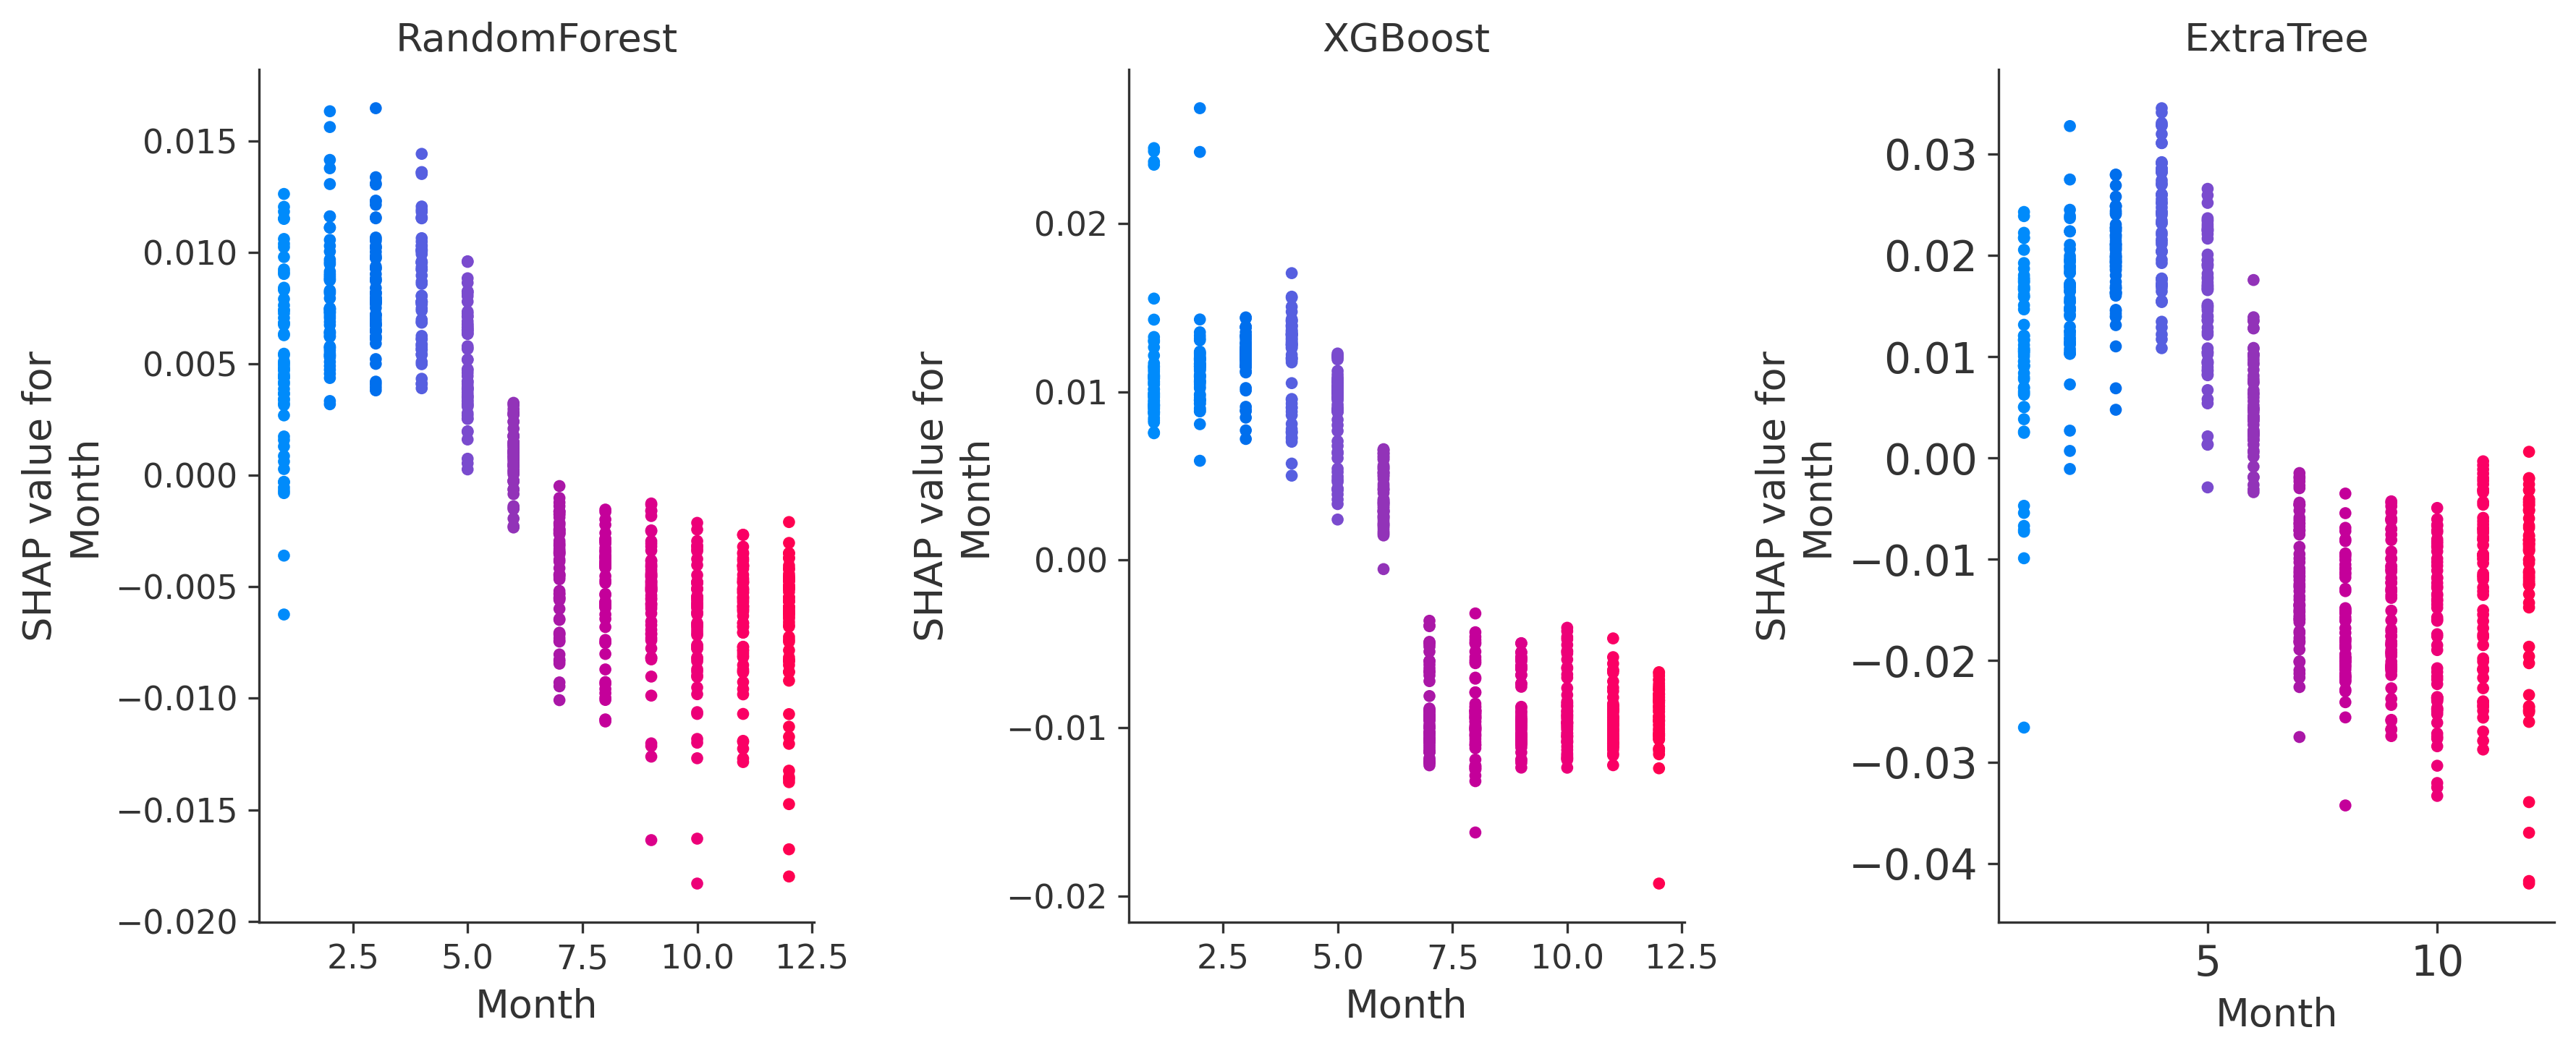

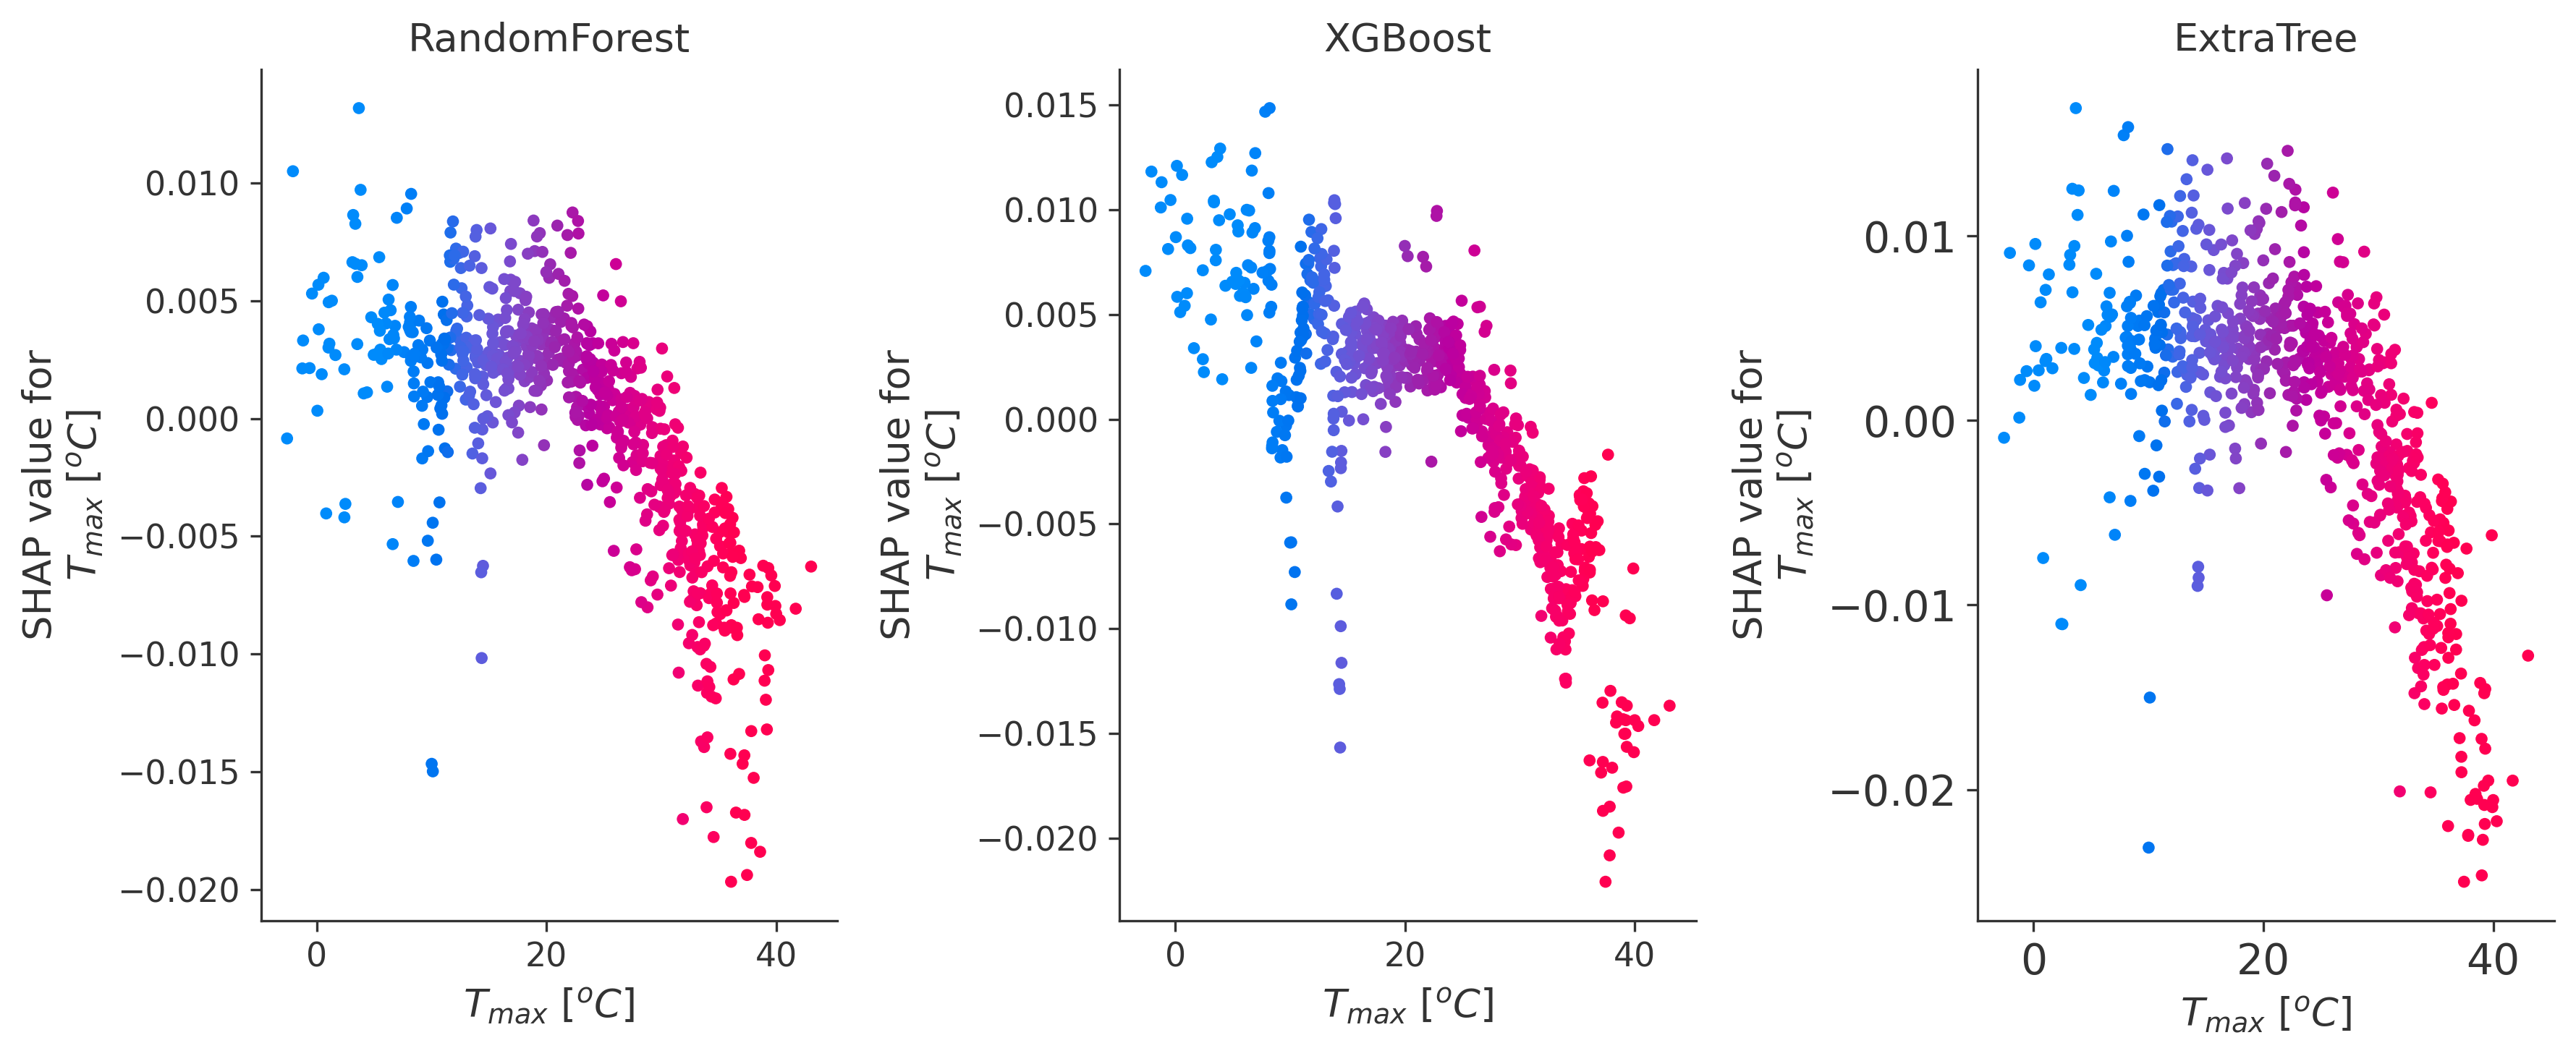

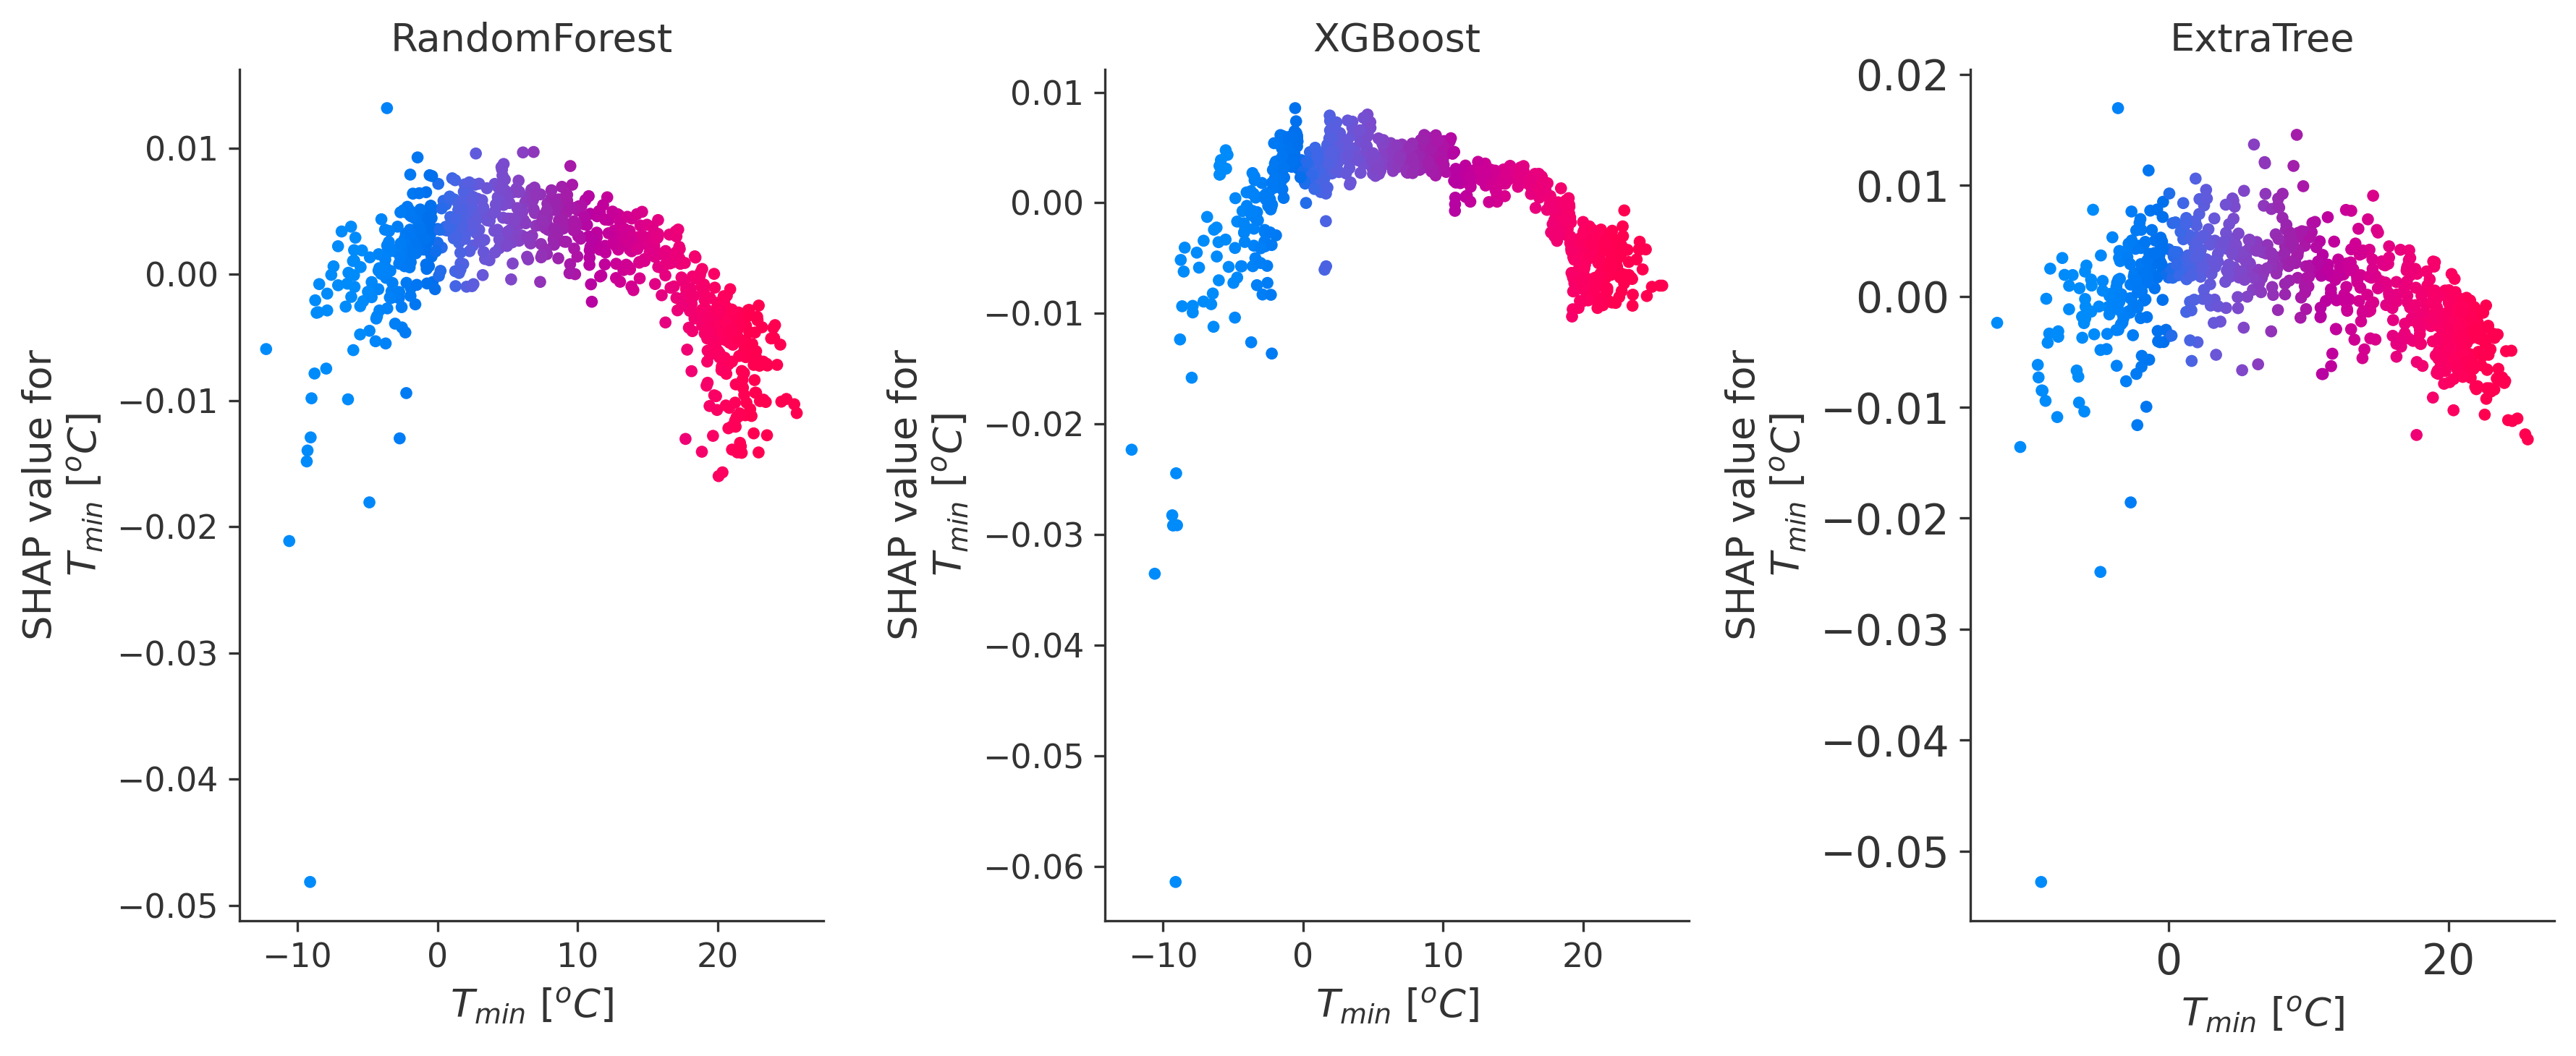

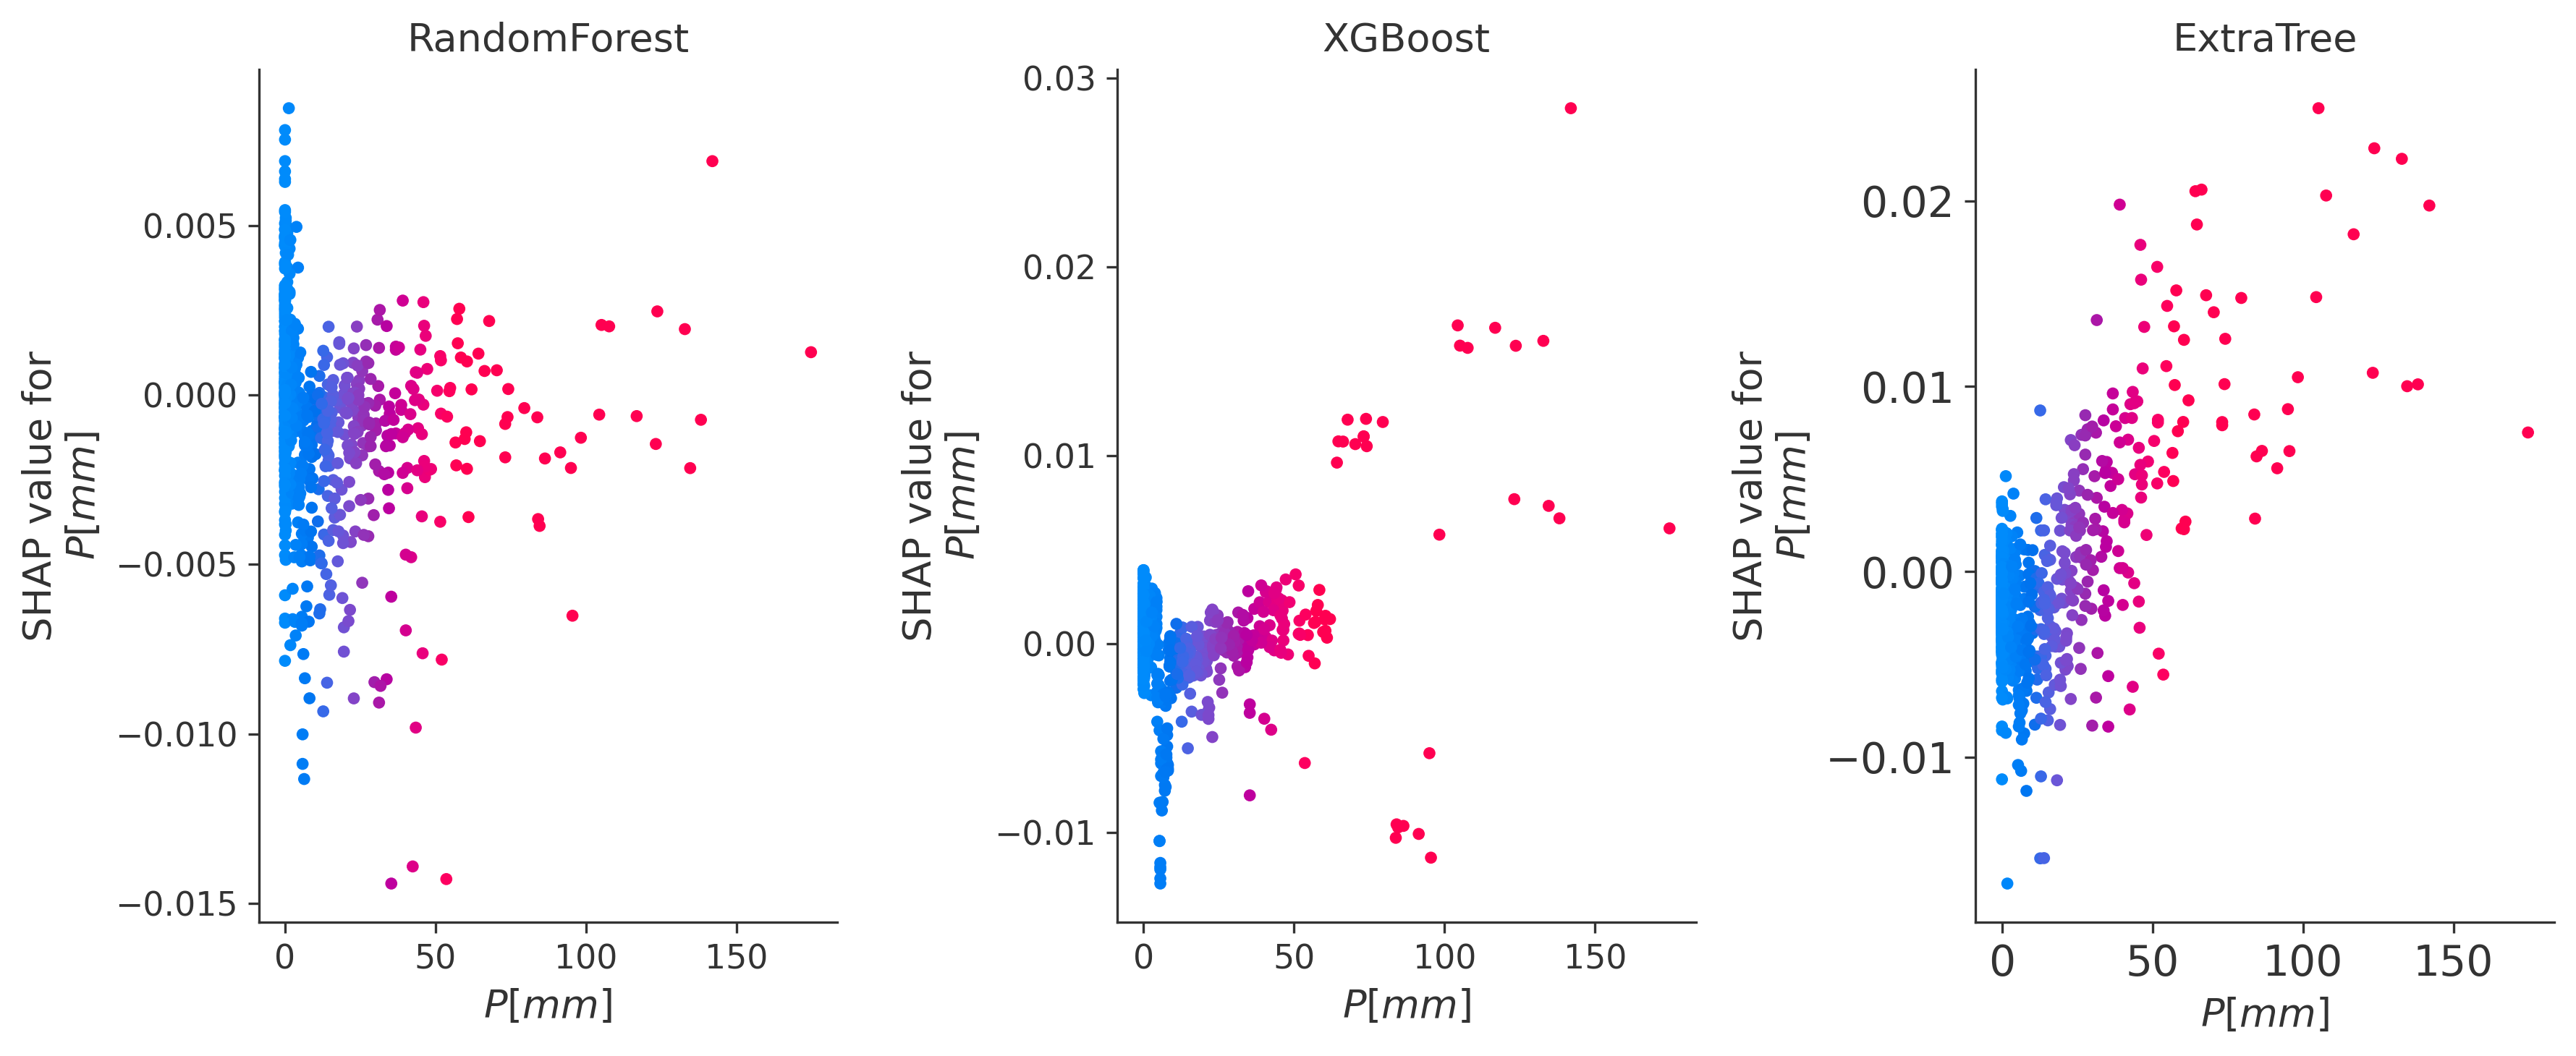

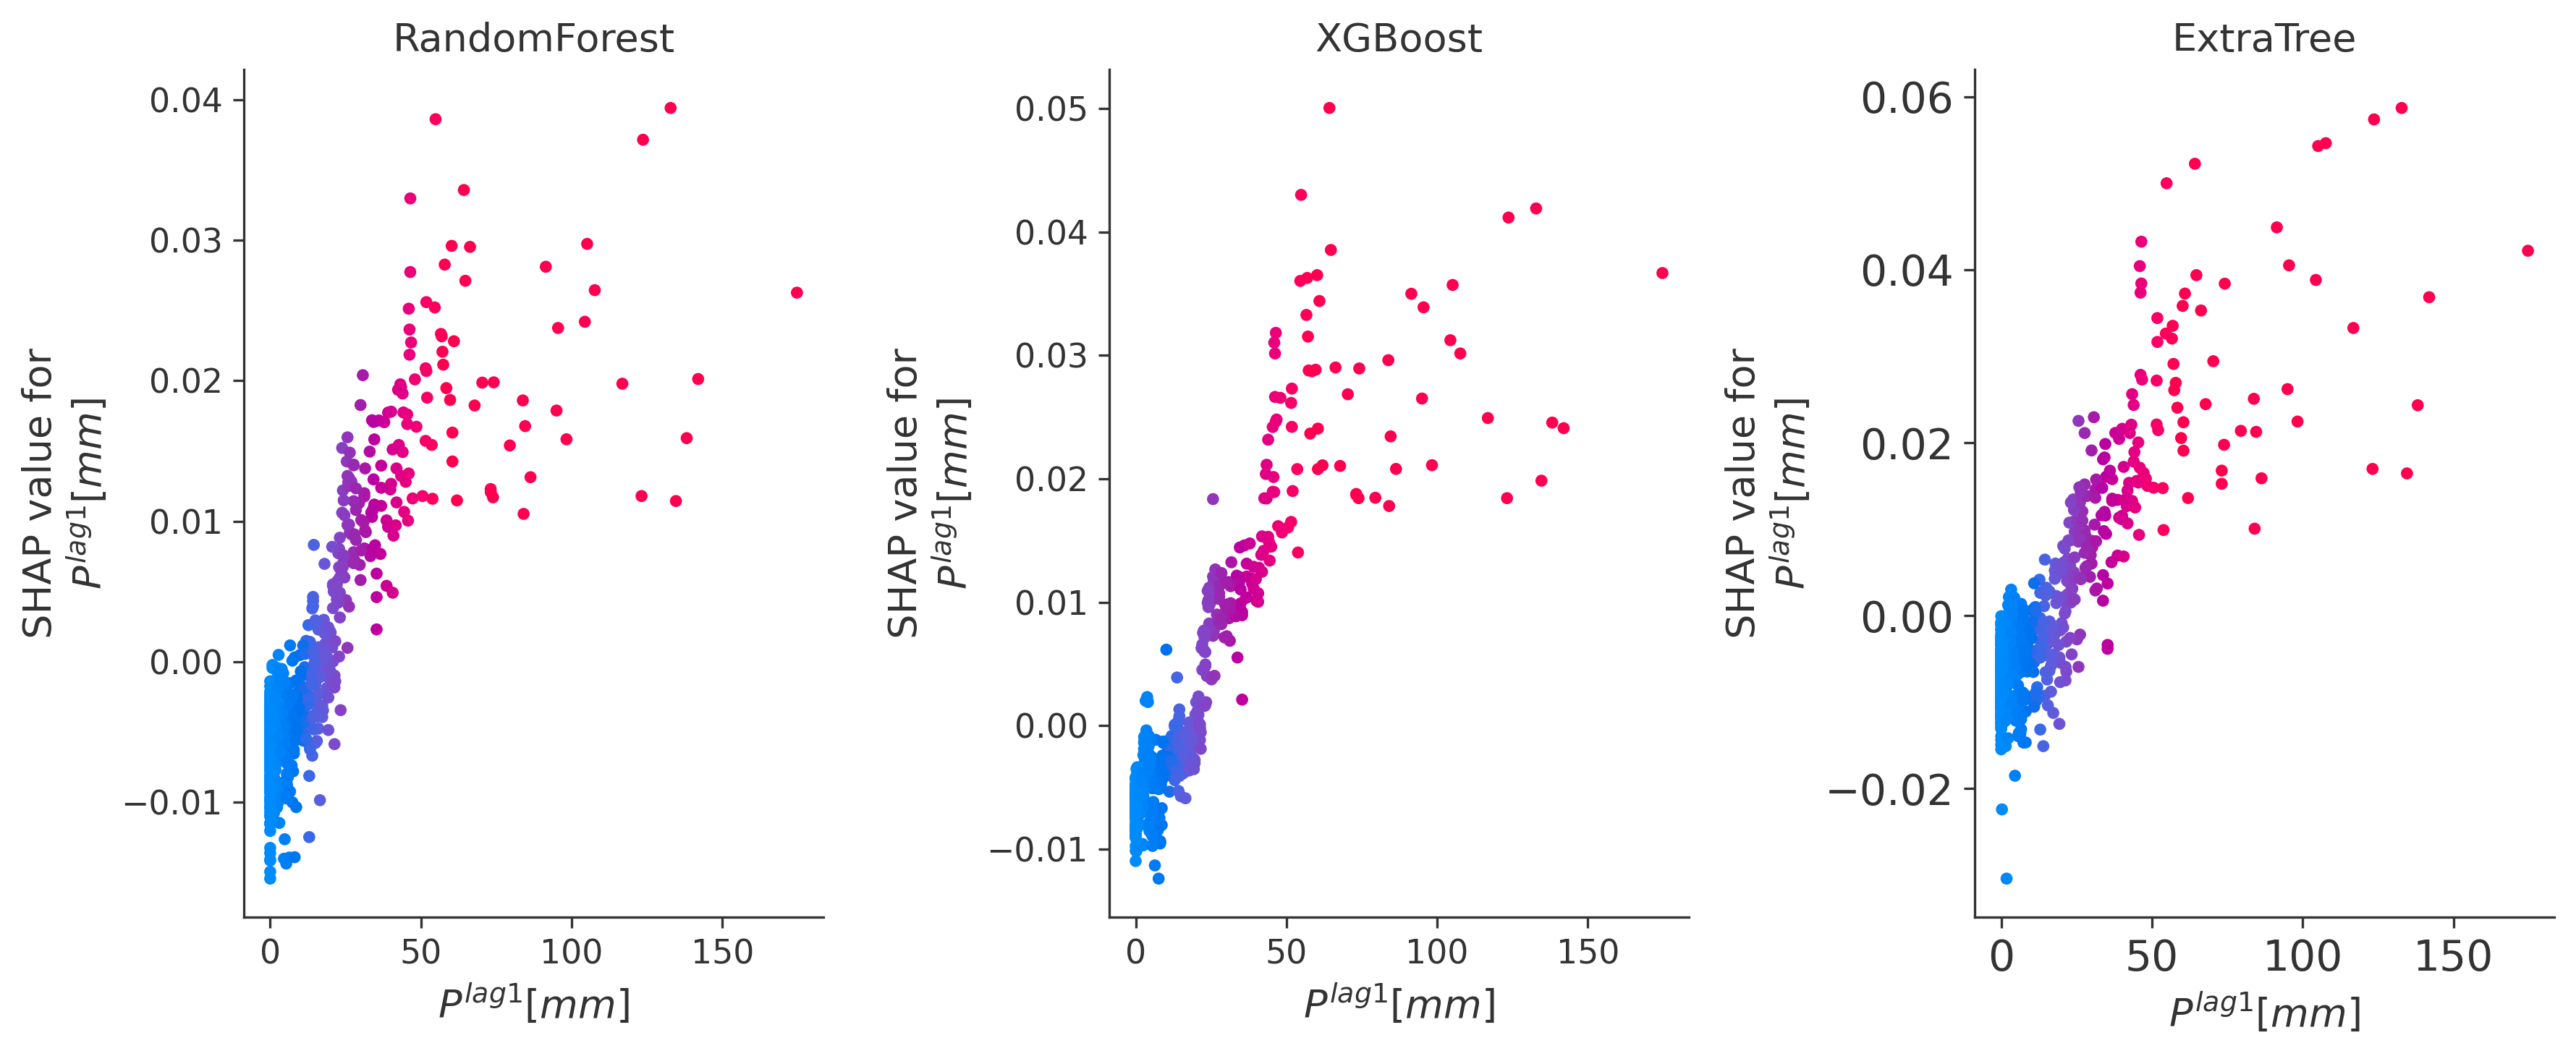

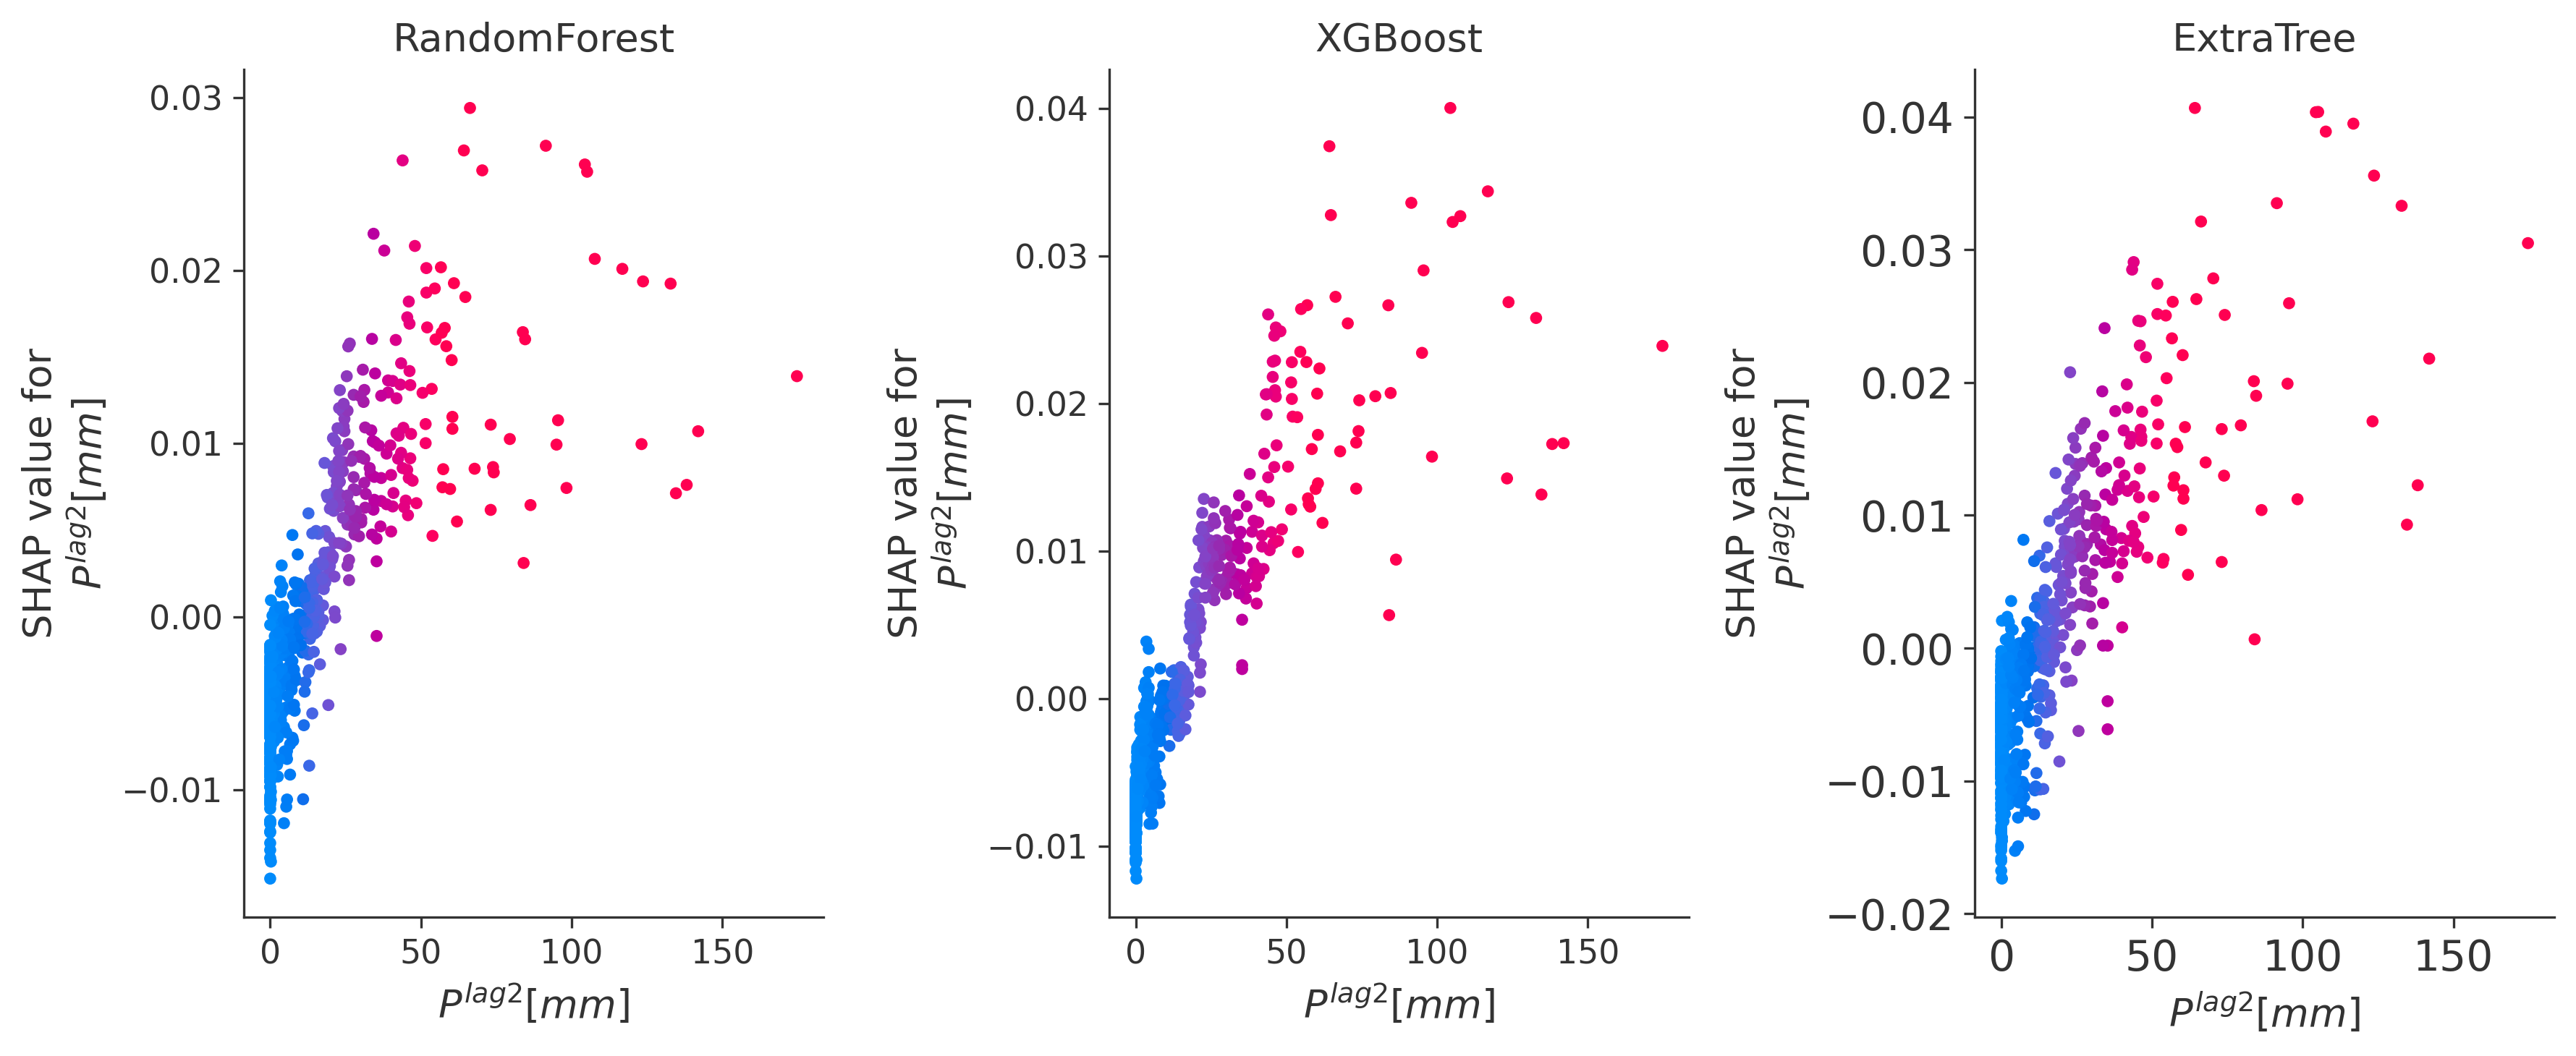

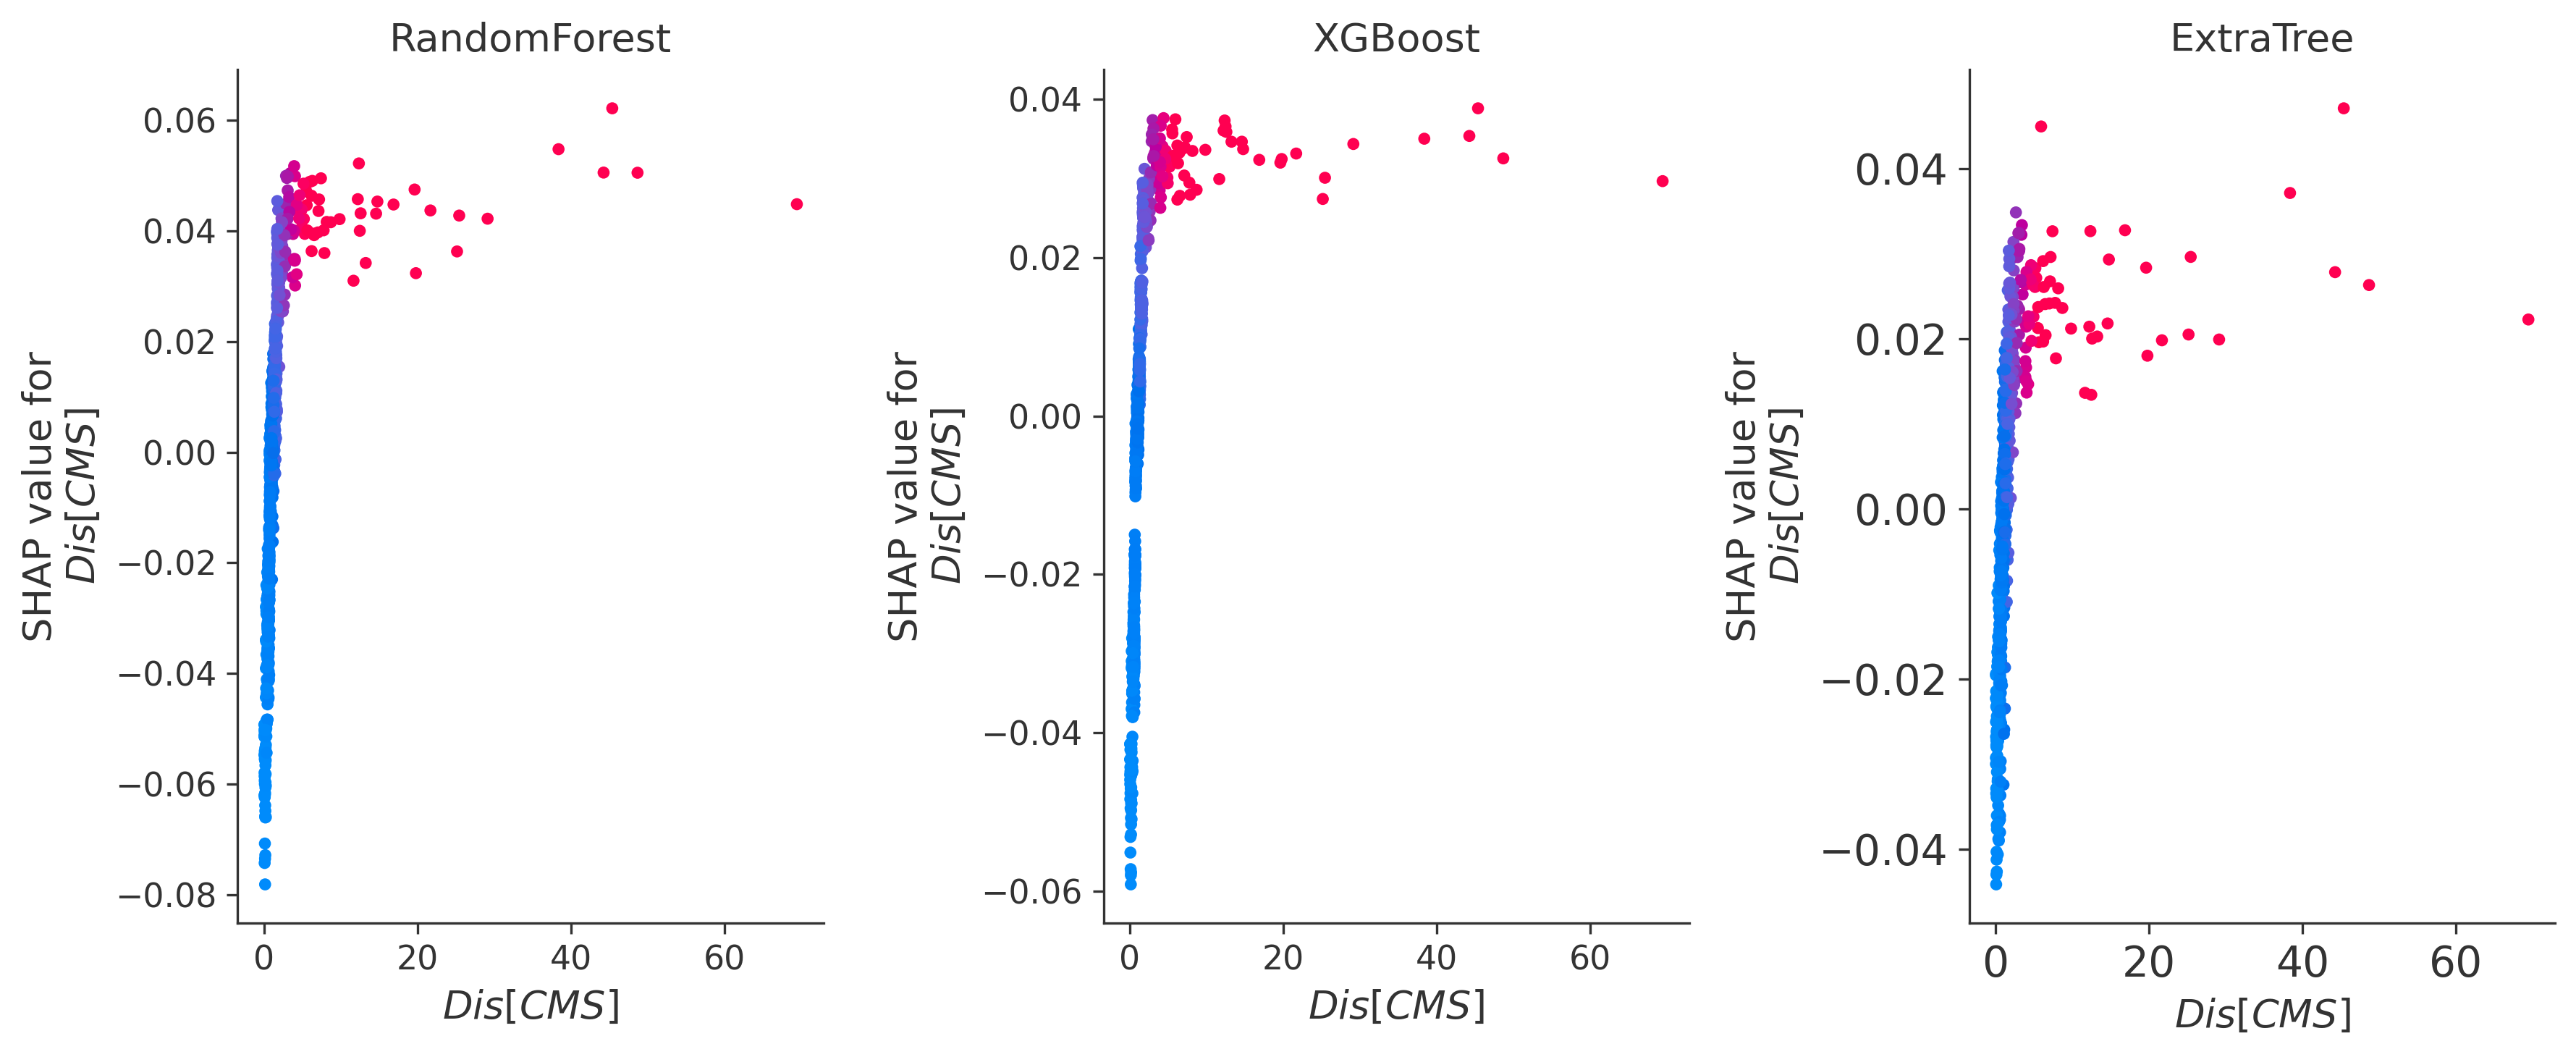

In [ ]:
for i in Features:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(i)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


The above feature dependency plot is to be improved as we get more data. 

# Load the yearly crop yield and SPEI data

In [ ]:
current_directory = os.getcwd()
file_location = r'/Inputs/Lake Creek Crop Yield Data.xlsx'

crop_yield = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name=None)
crop_yield.keys()


dict_keys(['Lake Wheat Acres Planted', 'Caddo County Wheat Yield'])

In [ ]:
crop_yield = crop_yield['Caddo County Wheat Yield'].sort_values(by = 'Year').set_index("Year")
crop_yield

NameError: name 'crop_yield' is not defined

In [ ]:
current_directory = os.getcwd()
file_location = r'/Inputs/caddo_SPEI.xlsx'

spei = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name="spei12")

spei_yearly = spei.sort_values(by = 'Years').set_index("Years")
spei_yearly["SPEI_Avg"] = spei_yearly.median(axis=1)

spei_yearly

In [ ]:
# Resample the temperature
resampled_yearly = df_F108[['TMAX (C)', "TMIN (C)"]].resample('Y').median()
# Resample the Precipitation & Discharge sum
resampled_yearly["PRCP_sum (mm)"] = df_F108["PRCP (mm)"].resample('Y').sum()
resampled_yearly["Dis_sum (CMS)"] = df_F108["CMS"].resample('Y').sum()
# Resample the SM
resampled_SM_yearly = df_F108.iloc[:, 4:].resample('Y').median()
# The transformed precipitation mean and median

df_F108_resampled_yearly = resampled_yearly.merge(resampled_SM_yearly, on='Date', how="inner")

df_F108_resampled_yearly['SPEI_Avg'] = spei_yearly["SPEI_Avg"].values

# df_F108_resampled_yearly['bu/ac *'] = crop_yield['bu/ac *'].values
df_F108_resampled_yearly['t/ha'] = crop_yield['t/ha'].values

corr_plot(df_F108_resampled_yearly, 'Data correlation plot')
